In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Préliminaires

In [3]:
def f_1(X):
    return np.sum(X**2)

def f_2(X):
    n = len(X)
    s = 0
    for i in range(1, n+1):
        s += (100**((i-1)/(n-1))*X[i-1])**2
    return s

def f_3(X):
    n = len(X)
    s = 10*n
    for x in X:
        s += x**2 - 10*np.cos(2*np.pi*x)
    return s

def f_4(X):
    n = len(X)
    s = 0
    for i in range(0,n-1):
        s += 100*(X[i]**2 -X[i+1])**2 + (X[i] - 1)**2
        
    return s

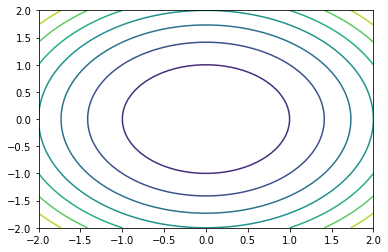

In [3]:
x = np.linspace(-2, 2, 50) 
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)
Z = []
for i in range(len(X)):
    l = []
    for j in range(len(Y)):
        l.append(f_1(np.array([X[i,j], Y[i,j]])))
    Z.append(l)
plt.contour(X, Y, Z)

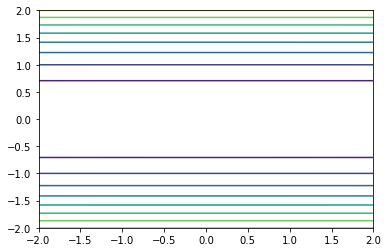

In [4]:
x = np.linspace(-2, 2, 50) 
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)
Z = []
for i in range(len(X)):
    l = []
    for j in range(len(Y)):
        l.append(f_2(np.array([X[i,j], Y[i,j]])))
    Z.append(l)
plt.contour(X, Y, Z)

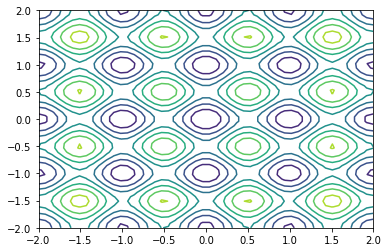

In [5]:
x = np.linspace(-2, 2, 50) 
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)
Z = []
for i in range(len(X)):
    l = []
    for j in range(len(Y)):
        l.append(f_3(np.array([X[i,j], Y[i,j]])))
    Z.append(l)
plt.contour(X, Y, Z)

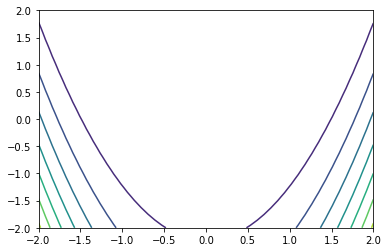

In [6]:
x = np.linspace(-2, 2, 50) 
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)
Z = []
for i in range(len(X)):
    l = []
    for j in range(len(Y)):
        l.append(f_4(np.array([X[i,j], Y[i,j]])))
    Z.append(l)
    
plt.contour(X, Y, Z)

In [4]:
def random_search(f, n, x_0, t_max=100):
    x1 = np.array(x_0)
    
    ys = []
    xs = []
    
    t = 0
    while t < t_max:
        t += 1
        
        u = np.random.uniform(-5, 5, n)
        
        y1 = f(x1)
        y2 = f(u)
        
        if y2 < y1:
            ys += [y2]
            x1 = u
            xs += [u]
        else:
            ys += [y1]
            xs += [x1]
                
    return xs, ys

first 5 xs :
[array([1, 1, 1, 1, 1]), array([1, 1, 1, 1, 1]), array([1, 1, 1, 1, 1]), array([1, 1, 1, 1, 1]), array([1, 1, 1, 1, 1])]
first 5 yss :
[5, 5, 5, 5, 5]
last 5 xs :
[array([-0.58980258,  0.27772186,  0.1675372 , -0.56028556,  0.66779544]), array([-0.58980258,  0.27772186,  0.1675372 , -0.56028556,  0.66779544]), array([-0.58980258,  0.27772186,  0.1675372 , -0.56028556,  0.66779544]), array([-0.58980258,  0.27772186,  0.1675372 , -0.56028556,  0.66779544]), array([-0.58980258,  0.27772186,  0.1675372 , -0.56028556,  0.66779544])]
last 5 ys :
[1.2129358979580973, 1.2129358979580973, 1.2129358979580973, 1.2129358979580973, 1.2129358979580973]


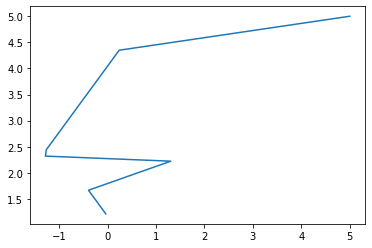

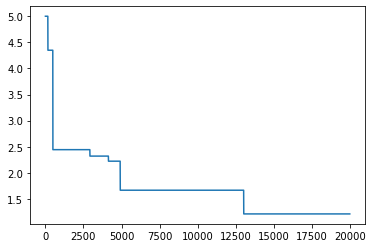

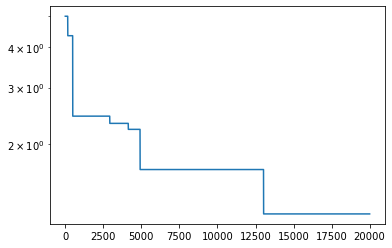

In [22]:
fig1 = plt.figure()
fig2 = plt.figure()
fig3 = plt.figure()


for i in range(5):
    xs, ys = random_search(f_1, 5, [1, 1, 1, 1, 1], t_max=20000)

    plt.plot(np.sum(xs, axis=1),ys)
    plt.show()

    plt.plot(np.arange(len(ys)),ys)
    plt.show()

    plt.semilogy(np.arange(len(ys)),ys)
    plt.show()

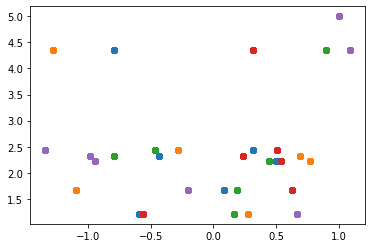

(20000, 5) (20000,)


In [30]:
xs = np.array(xs)
ys = np.array(ys)

plt.scatter(xs[:,0], ys)
plt.scatter(xs[:,1], ys)
plt.scatter(xs[:,2], ys)
plt.scatter(xs[:,3], ys)
plt.scatter(xs[:,4], ys)


plt.show()

print(xs.shape, ys.shape)

# 2. (1+1)-ES avec step-size constant

In [5]:
def ES_fixed_step_size(f, size, start, sig, t_max):
    
    x = start
    t = 0
    
    ys = []
    xs = []
    
    while t < t_max:
        t += 1
        xx = x + sig * np.random.normal(0, 1, size)
        
        y1 = f(x)
        y2 = f(xx)
        
        if y2 < y1:
            ys += [y2]
            x = xx
        else:
            ys += [y1]
        xs += [x]
            
    return xs, ys

first 5 xs :
[array([1, 1, 1, 1, 1]), array([1, 1, 1, 1, 1]), array([0.99961588, 0.99790073, 0.99868919, 0.99936568, 0.99971177]), array([1.0001271 , 0.9971201 , 0.99686236, 0.99831362, 1.00034323]), array([1.00014863, 0.99490522, 0.99760268, 0.99675552, 0.99959667])]
first 5 yss :
[5, 5, 4.990573253626912, 4.9855539465184355, 4.978059854492806]
last 5 xs :
[array([ 1.20698893e-07, -6.66029198e-05,  1.18024183e-04,  9.70760121e-05,
       -1.86066298e-05]), array([ 1.20698893e-07, -6.66029198e-05,  1.18024183e-04,  9.70760121e-05,
       -1.86066298e-05]), array([ 1.20698893e-07, -6.66029198e-05,  1.18024183e-04,  9.70760121e-05,
       -1.86066298e-05]), array([ 1.20698893e-07, -6.66029198e-05,  1.18024183e-04,  9.70760121e-05,
       -1.86066298e-05]), array([ 1.20698893e-07, -6.66029198e-05,  1.18024183e-04,  9.70760121e-05,
       -1.86066298e-05])]
last 5 ys :
[2.8135630183336816e-08, 2.8135630183336816e-08, 2.8135630183336816e-08, 2.8135630183336816e-08, 2.8135630183336816e-08]


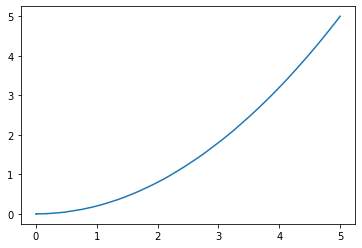

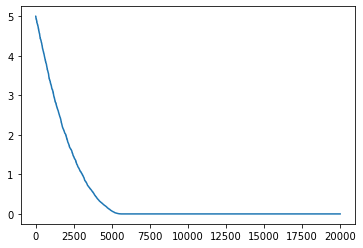

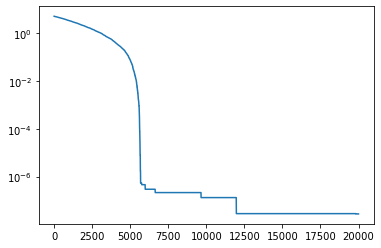

In [45]:
x = np.array([1,1,1,1,1])
xs, ys = ES_fixed_step_size(f_1, 5, x, .001, 2*10**4)

print("first 5 xs :")
print(xs[:5])
print("first 5 yss :")
print(ys[:5])

print("last 5 xs :")
print(xs[-5:])
print("last 5 ys :")
print(ys[-5:])

plt.plot(np.sum(xs, axis=1),ys)
plt.show()

plt.plot(np.arange(len(ys)),ys)
plt.show()

plt.semilogy(np.arange(len(ys)),ys)
plt.show()

first 5 xs :
[array([1.00017829, 0.99998907, 1.00088213, 0.99976889, 0.99819598]), array([1.0005642 , 1.00032523, 0.99995331, 1.00019038, 0.99770604]), array([1.00115993, 1.00036241, 0.99967345, 1.00029572, 0.99759608]), array([1.00115993, 1.00036241, 0.99967345, 1.00029572, 0.99759608]), array([1.00105345, 0.99993574, 0.99780253, 1.00032653, 0.99633649])]
first 5 yss :
[11074.66667938793, 11065.552474263402, 11063.51523393035, 11063.51523393035, 11038.078976657715]
last 5 xs :
[array([ 1.76933938e-01, -1.03131098e-03,  1.45744627e-03, -1.42057215e-04,
       -1.35088940e-05]), array([ 1.76933938e-01, -1.03131098e-03,  1.45744627e-03, -1.42057215e-04,
       -1.35088940e-05]), array([ 1.76933938e-01, -1.03131098e-03,  1.45744627e-03, -1.42057215e-04,
       -1.35088940e-05]), array([ 1.76933938e-01, -1.03131098e-03,  1.45744627e-03, -1.42057215e-04,
       -1.35088940e-05]), array([ 1.76933938e-01, -1.03131098e-03,  1.45744627e-03, -1.42057215e-04,
       -1.35088940e-05])]
last 5 ys :

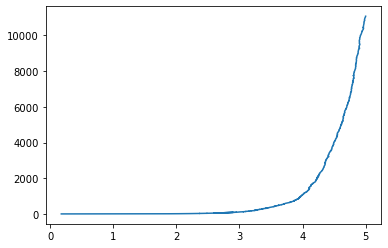

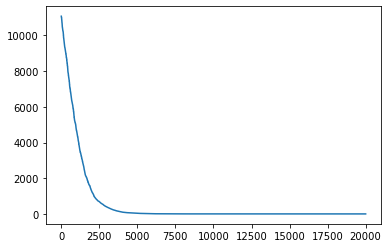

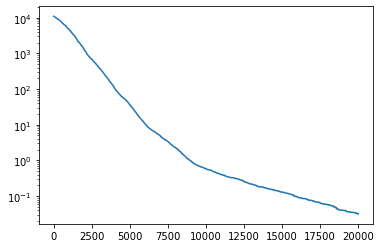

In [47]:
x = np.array([1,1,1,1,1])
xs, ys = ES_fixed_step_size(f_2, 5, x, .001, 2*10**4)

print("first 5 xs :")
print(xs[:5])
print("first 5 yss :")
print(ys[:5])

print("last 5 xs :")
print(xs[-5:])
print("last 5 ys :")
print(ys[-5:])

plt.plot(np.sum(xs, axis=1),ys)
plt.show()

plt.plot(np.arange(len(ys)),ys)
plt.show()

plt.semilogy(np.arange(len(ys)),ys)
plt.show()

first 5 xs :
[array([1, 1, 1, 1, 1]), array([1, 1, 1, 1, 1]), array([0.99879025, 0.99993506, 0.99895509, 1.00064269, 1.00058373]), array([0.99879025, 0.99993506, 0.99895509, 1.00064269, 1.00058373]), array([0.99781852, 1.00059154, 0.9982953 , 1.00188885, 0.99922195])]
first 5 yss :
[5.0, 5.0, 4.998471007256052, 4.998471007256052, 4.998050257460827]
last 5 xs :
[array([0.9950126 , 0.99485107, 0.99499897, 0.99477741, 0.9949009 ]), array([0.9950126 , 0.99485107, 0.99499897, 0.99477741, 0.9949009 ]), array([0.9950126 , 0.99485107, 0.99499897, 0.99477741, 0.9949009 ]), array([0.9950126 , 0.99485107, 0.99499897, 0.99477741, 0.9949009 ]), array([0.9950126 , 0.99485107, 0.99499897, 0.99477741, 0.9949009 ])]
last 5 ys :
[4.974805653319196, 4.974805653319196, 4.974805653319196, 4.974805653319196, 4.974805653319196]


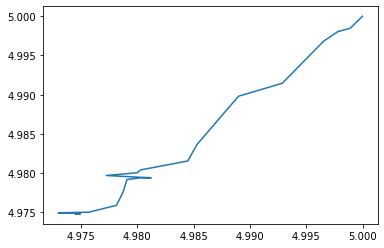

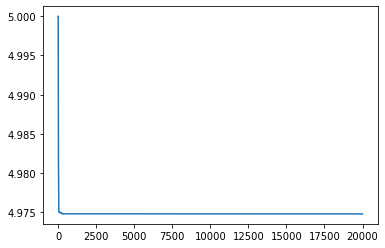

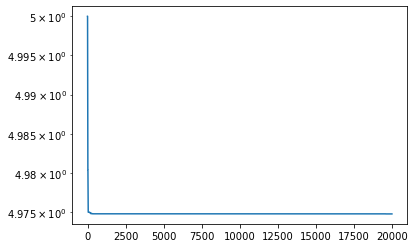

In [48]:
x = np.array([1,1,1,1,1])
xs, ys = ES_fixed_step_size(f_3, 5, x, .001, 2*10**4)

print("first 5 xs :")
print(xs[:5])
print("first 5 yss :")
print(ys[:5])

print("last 5 xs :")
print(xs[-5:])
print("last 5 ys :")
print(ys[-5:])

plt.plot(np.sum(xs, axis=1),ys)
plt.show()

plt.plot(np.arange(len(ys)),ys)
plt.show()

plt.semilogy(np.arange(len(ys)),ys)
plt.show()

first 5 xs :
[array([-6.92178193e-04,  9.99752763e-01,  8.26546792e-04,  9.99701894e-01,
       -1.02778089e-04]), array([-1.07807546e-03,  1.00009261e+00,  1.01055094e-03,  9.98795898e-01,
       -6.37775292e-04]), array([-1.69338091e-03,  9.98326700e-01,  6.88886851e-04,  9.97841748e-01,
       -1.19837731e-03]), array([-3.53583848e-03,  9.99266655e-01,  6.80849118e-04,  9.96226313e-01,
       -1.24804437e-03]), array([-3.18041745e-03,  9.98948470e-01,  5.20336452e-04,  9.96364174e-01,
       -1.55224207e-03])]
first 5 yss :
[401.52778500181546, 401.2590689225355, 399.8091525503114, 399.42121176947995, 399.40547849249043]
last 5 xs :
[array([0.98754513, 0.97557342, 0.95161405, 0.90457109, 0.81860036]), array([0.98754513, 0.97557342, 0.95161405, 0.90457109, 0.81860036]), array([0.98754513, 0.97557342, 0.95161405, 0.90457109, 0.81860036]), array([0.98754513, 0.97557342, 0.95161405, 0.90457109, 0.81860036]), array([0.98754513, 0.97557342, 0.95161405, 0.90457109, 0.81860036])]
last 5 ys 

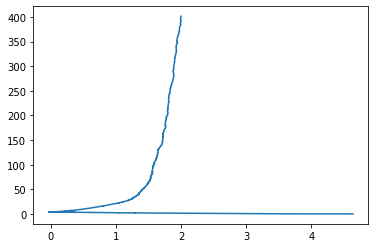

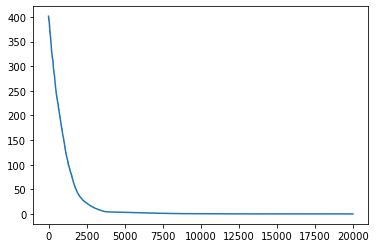

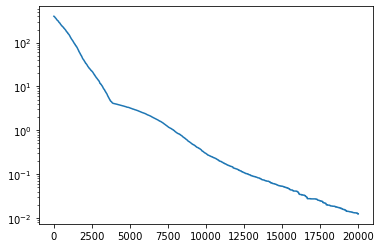

In [50]:
x = np.array([0,1,0,1,0])
xs, ys = ES_fixed_step_size(f_4, 5, x, .001, 2*10**4)

print("first 5 xs :")
print(xs[:5])
print("first 5 yss :")
print(ys[:5])

print("last 5 xs :")
print(xs[-5:])
print("last 5 ys :")
print(ys[-5:])

plt.plot(np.sum(xs, axis=1),ys)
plt.show()

plt.plot(np.arange(len(ys)),ys)
plt.show()

plt.semilogy(np.arange(len(ys)),ys)
plt.show()

# 3. (1+1)-ES avec step-size adaptatif

In [6]:
def ES_adaptatif_step_size(f, size, start, sig, t_max):
    x = start
    t = 0
    
    xs = []
    ys = []
    sigs = [sig]
    
    while t < t_max:
        t += 1
        xx = x + sig * np.random.normal(0, 1, size)
        
        y1 = f(x)
        y2 = f(xx)
        
        if y2 < y1:
            ys += [y2]
            x = xx
            sig = 1.5*sig
        else:
            ys += [y1]
            sig = 1.5**(-.25)*sig
        
        xs += [x]
        sigs += [sig]
            
    return xs, ys, sigs

first 5 xs :
  [1 1 1 1 1]
  [0.99866341 1.00050112 0.99907888 1.00155985 0.99989029]
  [0.99646811 0.99982743 0.99840117 1.0011411  0.99895902]
  [0.99646811 0.99982743 0.99840117 1.0011411  0.99895902]
  [0.99579208 0.99978245 0.99861565 0.99911429 0.99893221]
first 5 yss :
  5
  4.999392429627852
  4.9896111149119005
  4.9896111149119005
  4.984494956751796
first 5 sigs :
[0.001, 0.0009036020036098449, 0.0013554030054147674, 0.002033104508122151, 0.0018371173070873838]
last 5 xs :
  [-1.15497585e-162  1.95289002e-162 -1.54660532e-162  3.01896861e-163
 -1.45212347e-162]
  [-1.15497585e-162  1.95289002e-162 -1.54660532e-162  3.01896861e-163
 -1.45212347e-162]
  [-1.15497585e-162  1.95289002e-162 -1.54660532e-162  3.01896861e-163
 -1.45212347e-162]
  [-1.15497585e-162  1.95289002e-162 -1.54660532e-162  3.01896861e-163
 -1.45212347e-162]
  [-1.15497585e-162  1.95289002e-162 -1.54660532e-162  3.01896861e-163
 -1.45212347e-162]
last 5 ys :
  5e-324
  5e-324
  5e-324
  5e-324
  5e-324
last

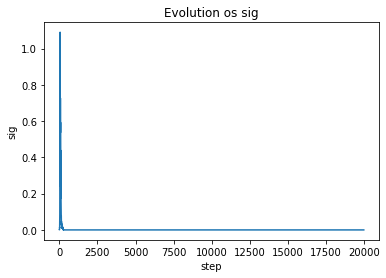

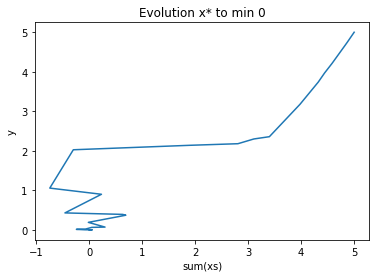

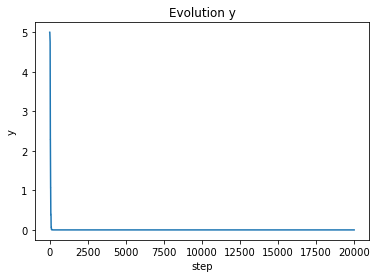

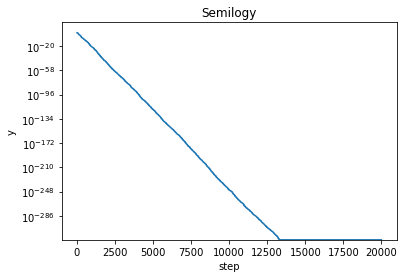

In [65]:
x = np.array([1,1,1,1,1])
xs, ys, sigs = ES_adaptatif_step_size(f_1, 5, x, .001, 2*10**4)

print("first 5 xs :")
for e in xs[:5]:
    print(' ', e)
print("first 5 yss :")
for e in ys[:5]:
    print(' ', e)
print("first 5 sigs :")
print(sigs[:5])

print("last 5 xs :")
for e in xs[-5:]:
    print(' ', e)
print("last 5 ys :")
for e in ys[-5:]:
    print(' ', e)
print("last 5 sigs :")
print(sigs[-5:])

plt.title("Evolution of sig")
plt.xlabel('step') 
plt.ylabel('sig') 
plt.plot(np.arange(len(sigs)),sigs)
plt.show()

plt.title("Evolution x* to min 0")
plt.xlabel('sum(xs)') 
plt.ylabel('y') 
plt.plot(np.sum(xs, axis=1),ys)
plt.show()

plt.title("Evolution y")
plt.xlabel('step') 
plt.ylabel('y')
plt.plot(np.arange(len(ys)),ys)
plt.show()

plt.title("Semilogy")
plt.xlabel('step') 
plt.ylabel('y')
plt.semilogy(np.arange(len(ys)),ys)
plt.show()

first 5 xs :
  [1 1 1 1 1]
  [1 1 1 1 1]
  [0.99961891 0.99968021 1.00102834 0.99950707 0.99939155]
  [1.00146291 0.99801391 1.00220415 1.00028155 0.99852835]
  [1.00146291 0.99801391 1.00220415 1.00028155 0.99852835]
first 5 yss :
  11111.0
  11111.0
  11098.04770800685
  11082.556303169928
  11082.556303169928
first 5 sigs :
[0.001, 0.0009036020036098449, 0.0008164965809277262, 0.0012247448713915894, 0.001837117307087384]
last 5 xs :
  [ 2.14259607e-01 -1.06558082e-03  2.51643337e-04  4.25889177e-05
 -3.85286794e-05]
  [ 2.14189774e-01 -1.01572321e-03  2.25830516e-04  7.28307914e-05
 -3.44097676e-05]
  [ 2.14196299e-01 -9.42877548e-04  1.71227679e-04  4.91490158e-05
 -3.75382202e-05]
  [ 2.14196299e-01 -9.42877548e-04  1.71227679e-04  4.91490158e-05
 -3.75382202e-05]
  [ 2.14196299e-01 -9.42877548e-04  1.71227679e-04  4.91490158e-05
 -3.75382202e-05]
last 5 ys :
  0.045941524610942884
  0.045909820897609484
  0.04590838343761736
  0.04590838343761736
  0.04590838343761736
last 5 sigs

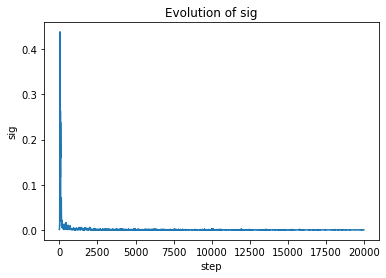

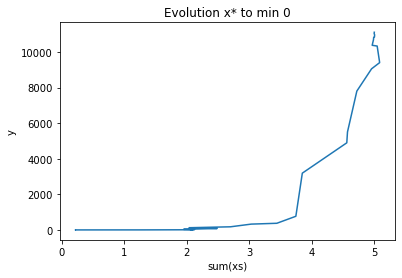

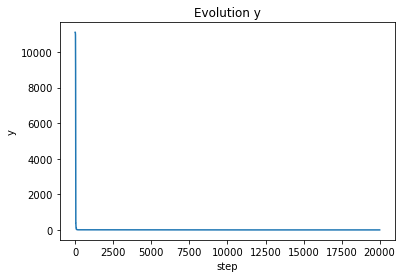

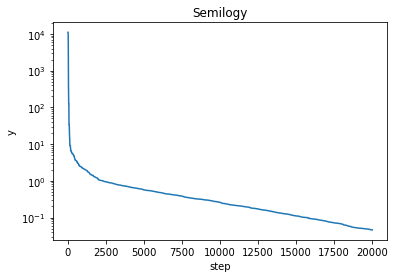

In [66]:
x = np.array([1,1,1,1,1])
xs, ys, sigs = ES_adaptatif_step_size(f_2, 5, x, .001, 2*10**4)

print("first 5 xs :")
for e in xs[:5]:
    print(' ', e)
print("first 5 yss :")
for e in ys[:5]:
    print(' ', e)
print("first 5 sigs :")
print(sigs[:5])

print("last 5 xs :")
for e in xs[-5:]:
    print(' ', e)
print("last 5 ys :")
for e in ys[-5:]:
    print(' ', e)
print("last 5 sigs :")
print(sigs[-5:])

plt.title("Evolution of sig")
plt.xlabel('step') 
plt.ylabel('sig') 
plt.plot(np.arange(len(sigs)),sigs)
plt.show()

plt.title("Evolution x* to min 0")
plt.xlabel('sum(xs)') 
plt.ylabel('y') 
plt.plot(np.sum(xs, axis=1),ys)
plt.show()

plt.title("Evolution y")
plt.xlabel('step') 
plt.ylabel('y')
plt.plot(np.arange(len(ys)),ys)
plt.show()

plt.title("Semilogy")
plt.xlabel('step') 
plt.ylabel('y')
plt.semilogy(np.arange(len(ys)),ys)
plt.show()

first 5 xs :
  [1 1 1 1 1]
  [1.00052092 0.99964472 0.99931567 1.00005239 1.00011948]
  [1.00018316 0.99979708 0.9976989  0.99973323 1.00037249]
  [1.00018316 0.99979708 0.9976989  0.99973323 1.00037249]
  [1.00018316 0.99979708 0.9976989  0.99973323 1.00037249]
first 5 yss :
  5.0
  4.999481520861487
  4.9966766617058145
  4.9966766617058145
  4.9966766617058145
first 5 sigs :
[0.001, 0.0009036020036098449, 0.0013554030054147674, 0.002033104508122151, 0.0018371173070873838]
last 5 xs :
  [0.99495864 0.99495864 0.99495864 0.99495864 0.99495863]
  [0.99495864 0.99495864 0.99495864 0.99495864 0.99495863]
  [0.99495864 0.99495864 0.99495864 0.99495864 0.99495863]
  [0.99495864 0.99495864 0.99495864 0.99495864 0.99495863]
  [0.99495864 0.99495864 0.99495864 0.99495864 0.99495863]
last 5 ys :
  4.974795285466465
  4.974795285466465
  4.974795285466465
  4.974795285466465
  4.974795285466465
last 5 sigs :
[2.5e-323, 2.5e-323, 2.5e-323, 2.5e-323, 2.5e-323]


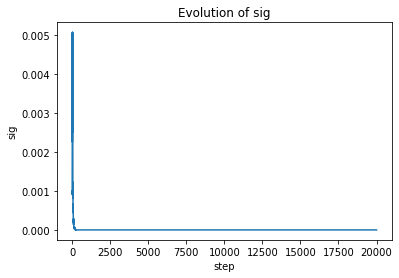

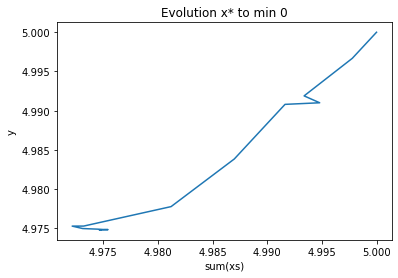

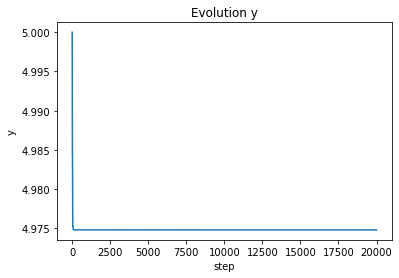

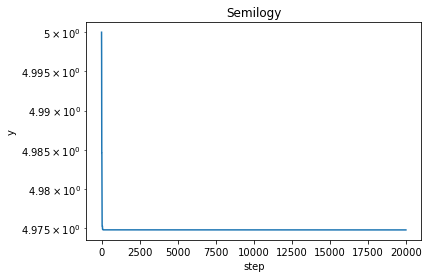

In [67]:
x = np.array([1,1,1,1,1])
xs, ys, sigs = ES_adaptatif_step_size(f_3, 5, x, .001, 2*10**4)

print("first 5 xs :")
for e in xs[:5]:
    print(' ', e)
print("first 5 yss :")
for e in ys[:5]:
    print(' ', e)
print("first 5 sigs :")
print(sigs[:5])

print("last 5 xs :")
for e in xs[-5:]:
    print(' ', e)
print("last 5 ys :")
for e in ys[-5:]:
    print(' ', e)
print("last 5 sigs :")
print(sigs[-5:])

plt.title("Evolution of sig")
plt.xlabel('step') 
plt.ylabel('sig') 
plt.plot(np.arange(len(sigs)),sigs)
plt.show()

plt.title("Evolution x* to min 0")
plt.xlabel('sum(xs)') 
plt.ylabel('y') 
plt.plot(np.sum(xs, axis=1),ys)
plt.show()

plt.title("Evolution y")
plt.xlabel('step') 
plt.ylabel('y')
plt.plot(np.arange(len(ys)),ys)
plt.show()

plt.title("Semilogy")
plt.xlabel('step') 
plt.ylabel('y')
plt.semilogy(np.arange(len(ys)),ys)
plt.show()

In [7]:
def f_5(X):
    return f_1(X)**(.25)

def f_6(X):
    return f_2(X)**(.25)

first 5 xs :
  [1 1 1 1 1]
  [1.00062938 1.00022312 0.99954441 1.0003755  0.99893458]
  [1.00062938 1.00022312 0.99954441 1.0003755  0.99893458]
  [1.00062938 1.00022312 0.99954441 1.0003755  0.99893458]
  [0.99946692 1.00083513 0.99837571 1.00073475 0.99882361]
first 5 yss :
  1.4953487812212205
  1.4953051092210998
  1.4953051092210998
  1.4953051092210998
  1.495085364651122
first 5 sigs :
[0.001, 0.0009036020036098449, 0.0013554030054147674, 0.0012247448713915894, 0.001106681919700322]
last 5 xs :
  [-4.92427088e-163 -1.56894874e-162  2.60437200e-163  6.46555223e-163
 -1.37946382e-162]
  [-4.92427088e-163 -1.56894874e-162  2.60437200e-163  6.46555223e-163
 -1.37946382e-162]
  [-4.92427088e-163 -1.56894874e-162  2.60437200e-163  6.46555223e-163
 -1.37946382e-162]
  [-4.92427088e-163 -1.56894874e-162  2.60437200e-163  6.46555223e-163
 -1.37946382e-162]
  [-4.92427088e-163 -1.56894874e-162  2.60437200e-163  6.46555223e-163
 -1.37946382e-162]
last 5 ys :
  0.0
  0.0
  0.0
  0.0
  0.0
l

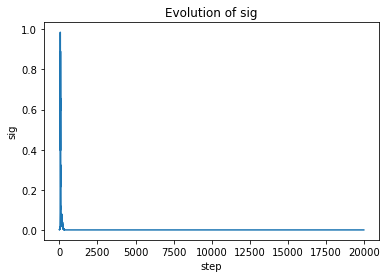

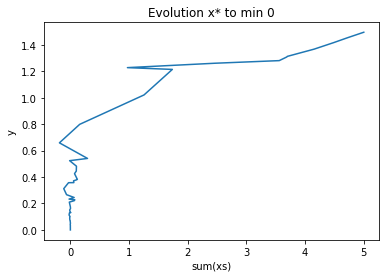

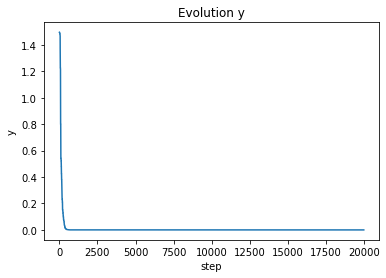

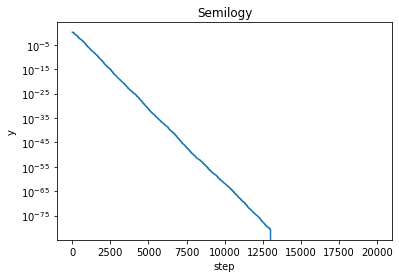

In [69]:
x = np.array([1,1,1,1,1])
xs, ys, sigs = ES_adaptatif_step_size(f_5, 5, x, .001, 2*10**4)

print("first 5 xs :")
for e in xs[:5]:
    print(' ', e)
print("first 5 yss :")
for e in ys[:5]:
    print(' ', e)
print("first 5 sigs :")
print(sigs[:5])

print("last 5 xs :")
for e in xs[-5:]:
    print(' ', e)
print("last 5 ys :")
for e in ys[-5:]:
    print(' ', e)
print("last 5 sigs :")
print(sigs[-5:])

plt.title("Evolution of sig")
plt.xlabel('step') 
plt.ylabel('sig') 
plt.plot(np.arange(len(sigs)),sigs)
plt.show()

plt.title("Evolution x* to min 0")
plt.xlabel('sum(xs)') 
plt.ylabel('y') 
plt.plot(np.sum(xs, axis=1),ys)
plt.show()

plt.title("Evolution y")
plt.xlabel('step') 
plt.ylabel('y')
plt.plot(np.arange(len(ys)),ys)
plt.show()

plt.title("Semilogy")
plt.xlabel('step') 
plt.ylabel('y')
plt.semilogy(np.arange(len(ys)),ys)
plt.show()

first 5 xs :
  [1 1 1 1 1]
  [1 1 1 1 1]
  [0.99972542 1.00082507 1.00045646 0.99974785 0.99973491]
  [0.99972542 1.00082507 1.00045646 0.99974785 0.99973491]
  [0.99972542 1.00082507 1.00045646 0.99974785 0.99973491]
first 5 yss :
  10.266875293454754
  10.266875293454754
  10.265558752390955
  10.265558752390955
  10.265558752390955
first 5 sigs :
[0.001, 0.0009036020036098449, 0.0008164965809277262, 0.0012247448713915894, 0.001106681919700322]
last 5 xs :
  [ 5.55937423e-01  2.72925062e-03 -4.39318915e-04  2.26311616e-04
  3.99177412e-05]
  [ 5.55643782e-01  2.73576206e-03 -1.24566844e-03 -2.89351417e-04
 -2.07140355e-05]
  [ 5.55643782e-01  2.73576206e-03 -1.24566844e-03 -2.89351417e-04
 -2.07140355e-05]
  [ 5.55643782e-01  2.73576206e-03 -1.24566844e-03 -2.89351417e-04
 -2.07140355e-05]
  [ 5.55643782e-01  2.73576206e-03 -1.24566844e-03 -2.89351417e-04
 -2.07140355e-05]
last 5 ys :
  0.7457091595199397
  0.7456070597971572
  0.7456070597971572
  0.7456070597971572
  0.745607059797

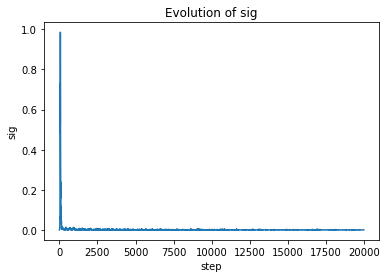

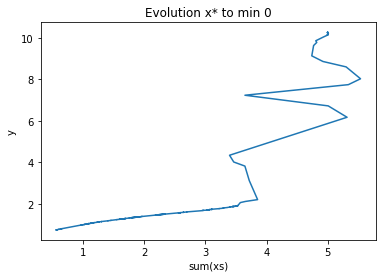

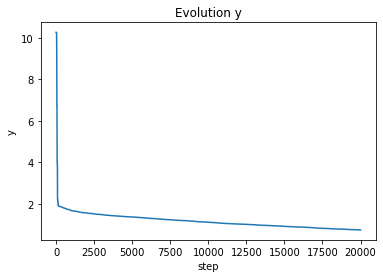

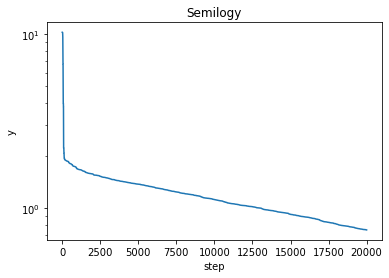

In [70]:
x = np.array([1,1,1,1,1])
xs, ys, sigs = ES_adaptatif_step_size(f_6, 5, x, .001, 2*10**4)

print("first 5 xs :")
for e in xs[:5]:
    print(' ', e)
print("first 5 yss :")
for e in ys[:5]:
    print(' ', e)
print("first 5 sigs :")
print(sigs[:5])

print("last 5 xs :")
for e in xs[-5:]:
    print(' ', e)
print("last 5 ys :")
for e in ys[-5:]:
    print(' ', e)
print("last 5 sigs :")
print(sigs[-5:])

plt.title("Evolution of sig")
plt.xlabel('step') 
plt.ylabel('sig') 
plt.plot(np.arange(len(sigs)),sigs)
plt.show()

plt.title("Evolution x* to min 0")
plt.xlabel('sum(xs)') 
plt.ylabel('y') 
plt.plot(np.sum(xs, axis=1),ys)
plt.show()

plt.title("Evolution y")
plt.xlabel('step') 
plt.ylabel('y')
plt.plot(np.arange(len(ys)),ys)
plt.show()

plt.title("Semilogy")
plt.xlabel('step') 
plt.ylabel('y')
plt.semilogy(np.arange(len(ys)),ys)
plt.show()

# Strat1

In [15]:
def escma(f, mu, lambd, start, sig, t_max):
    x = start
    t = 0
    
    xs = []
    ys = []
    sigs = [sig]
    
    while t < t_max:
        t += 1
        x = x + sig * np.random.normal(0, 1, size=(lambd,len(start)))
        
        # calc
        tmp_y = np.array([])
        for x_i in x:
            tmp_y = np.append(tmp_y, f(x_i))
        
        # reorder
        ind = np.argsort(tmp_y)
        tmp_y_order = tmp_y[ind][:mu]
        
        w = tmp_y_order / tmp_y[ind][:mu].sum()
        
        x *= w
        xs += [x]
        ys += [tmp_y]
        
        #print('w : ', w)
        #print('tmp_y_order : ', tmp_y_order)
        #break
            
    return xs, ys, sigs

xs.shape:  (100, 5, 5)
ys.shape:  (100, 5)
first 5 xs :
  [[0.19573178 0.19844444 0.20045334 0.20123337 0.20418154]
 [0.19713429 0.20284453 0.1995687  0.20359844 0.20149608]
 [0.19851035 0.19867992 0.20160495 0.20358644 0.2008018 ]
 [0.19441392 0.19494111 0.19990723 0.20294351 0.20291645]
 [0.1968588  0.19888826 0.2026761  0.20090011 0.20553858]]
  [[0.04063197 0.0372757  0.04240478 0.0426715  0.04530405]
 [0.03705567 0.0410072  0.04184311 0.04190134 0.04234128]
 [0.03889409 0.03808237 0.03920466 0.04173952 0.044768  ]
 [0.03998177 0.0406661  0.0400296  0.04301322 0.04121461]
 [0.03683638 0.03858272 0.03956569 0.04458263 0.04363283]]
  [[0.00697388 0.00766834 0.01041221 0.00864726 0.01090277]
 [0.00645008 0.00622632 0.01121628 0.00658665 0.01276407]
 [0.00652471 0.00908102 0.00672483 0.00927138 0.01258281]
 [0.00434365 0.0105256  0.00891462 0.01239318 0.01341403]
 [0.00404446 0.00912908 0.00680587 0.00995644 0.00703146]]
  [[ 6.73762276e-04  8.81789866e-04  2.83773701e-03  5.23126691e-

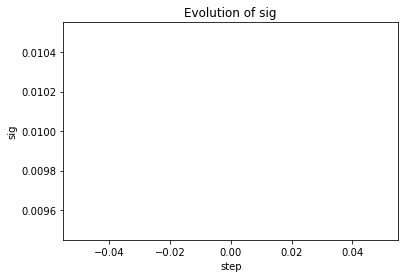

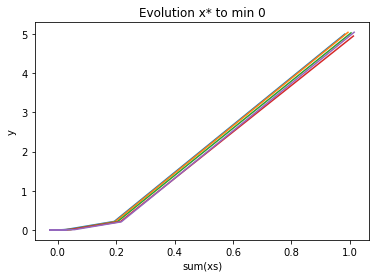

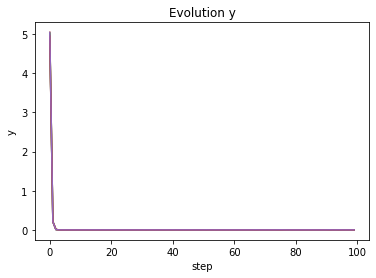

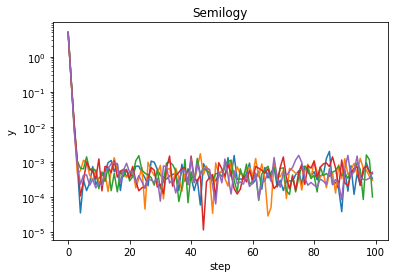

In [21]:
x = np.array([1,1,1,1,1])
xs, ys, sigs = escma(f_1, 5, 5, x, 0.01, 100)

xs = np.array(xs)
ys = np.array(ys)

print('xs.shape: ', xs.shape)
print('ys.shape: ', ys.shape)

print("first 5 xs :")
for e in xs[:5]:
    print(' ', e)
print("first 5 yss :")
for e in ys[:5]:
    print(' ', e)
print("first 5 sigs :")
print(sigs[:5])

print("last 5 xs :")
for e in xs[-5:]:
    print(' ', e)
print("last 5 ys :")
for e in ys[-5:]:
    print(' ', e)
print("last 5 sigs :")
print(sigs[-5:])

plt.title("Evolution of sig")
plt.xlabel('step') 
plt.ylabel('sig') 
plt.plot(np.arange(len(sigs)),sigs)
plt.show()

plt.title("Evolution x* to min 0")
plt.xlabel('sum(xs)') 
plt.ylabel('y') 
plt.plot(np.sum(xs, axis=1),np.array(ys))
plt.show()

plt.title("Evolution y")
plt.xlabel('step') 
plt.ylabel('y')
plt.plot(np.arange(len(ys)),np.array(ys))
plt.show()

plt.title("Semilogy")
plt.xlabel('step') 
plt.ylabel('y')
plt.semilogy(np.arange(len(ys)),np.array(ys))
plt.show()

# Campaign

In [8]:
def campaign(strat, f, size, start, sig, t_max):
    if strat == random_search:
        x, z = strat(f, size, start, t_max)
    else:
        x, z = strat(f, size, start, sig, t_max)
            
    return x, z

def do_campaign(strats, fs, size, starts, sigs, t_maxs, verbose=False):
    i = 0
    for s in strats:
        for f in fs:            
            for strt in starts:
                for sig in sigs:
                    for t in t_maxs:
                        i += 1
                        if verbose:
                            print("do_campaign", i, ": strat:", str(s), ", func: ", str(f), ", size:", size, ", start:", strt, ", sig:", sig, ", t_max:", t)
                            
                        x, z = campaign(s, f, size, strt, sig, t)
                        plt.semilogy(np.arange(len(z)),z)
                        plt.title("func:" + str(f) + ", strt:" + str(strt) + ", sig:" + str(sig) + ", t:" + str(t))
                        plt.show()

do_campaign 1 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_1 at 0x7fe739c388b0> , size: 5 , start: [337 362 168 434 310] , sig: 1e-05 , t_max: 500


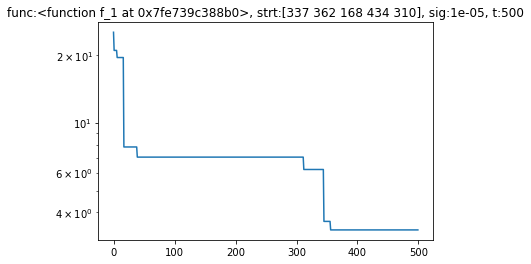

do_campaign 2 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_1 at 0x7fe739c388b0> , size: 5 , start: [337 362 168 434 310] , sig: 1e-05 , t_max: 1000


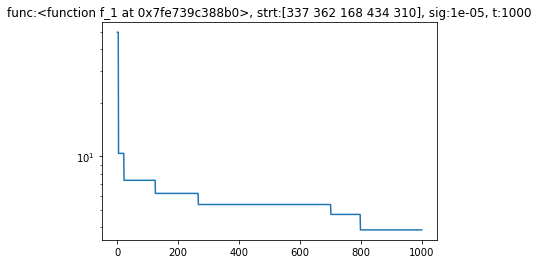

do_campaign 3 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_1 at 0x7fe739c388b0> , size: 5 , start: [337 362 168 434 310] , sig: 0.001 , t_max: 500


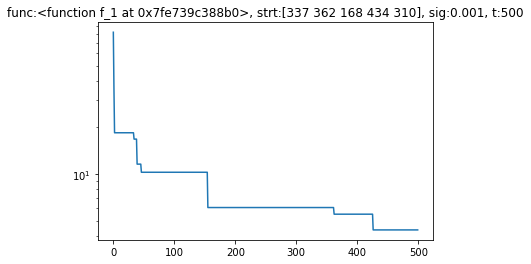

do_campaign 4 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_1 at 0x7fe739c388b0> , size: 5 , start: [337 362 168 434 310] , sig: 0.001 , t_max: 1000


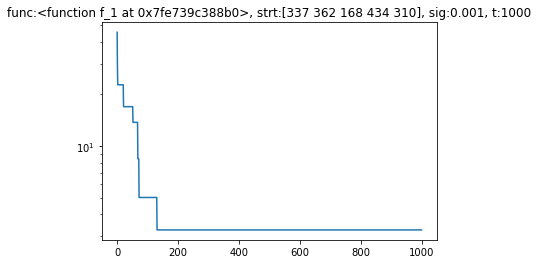

do_campaign 5 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_1 at 0x7fe739c388b0> , size: 5 , start: [337 362 168 434 310] , sig: 0.1 , t_max: 500


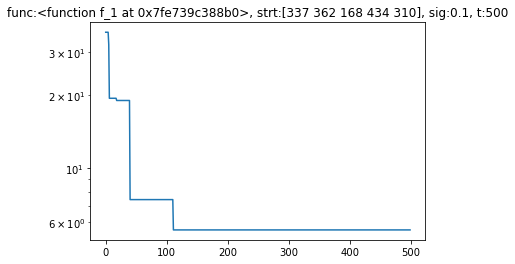

do_campaign 6 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_1 at 0x7fe739c388b0> , size: 5 , start: [337 362 168 434 310] , sig: 0.1 , t_max: 1000


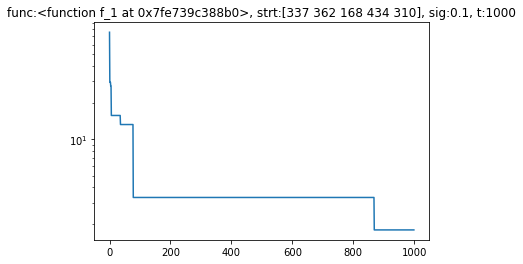

do_campaign 7 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_1 at 0x7fe739c388b0> , size: 5 , start: [337 362 168 434 310] , sig: 1 , t_max: 500


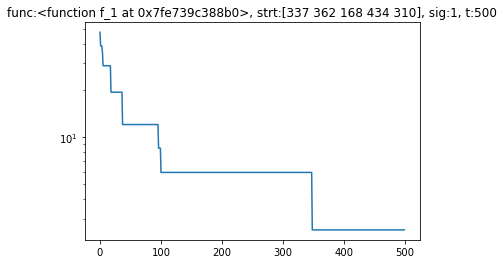

do_campaign 8 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_1 at 0x7fe739c388b0> , size: 5 , start: [337 362 168 434 310] , sig: 1 , t_max: 1000


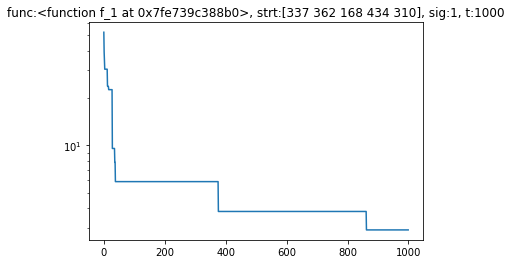

do_campaign 9 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_1 at 0x7fe739c388b0> , size: 5 , start: [337 362 168 434 310] , sig: 100 , t_max: 500


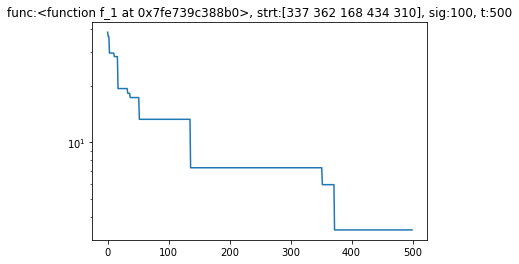

do_campaign 10 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_1 at 0x7fe739c388b0> , size: 5 , start: [337 362 168 434 310] , sig: 100 , t_max: 1000


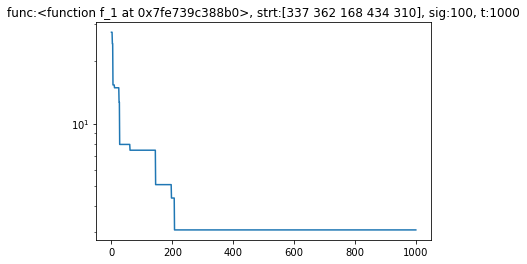

do_campaign 11 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_1 at 0x7fe739c388b0> , size: 5 , start: [190 115  90 136 318] , sig: 1e-05 , t_max: 500


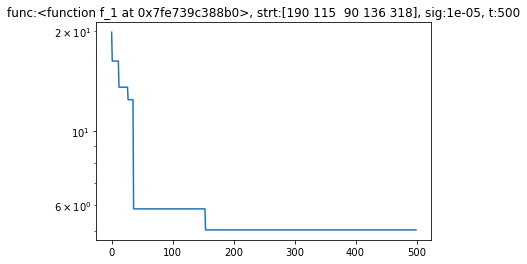

do_campaign 12 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_1 at 0x7fe739c388b0> , size: 5 , start: [190 115  90 136 318] , sig: 1e-05 , t_max: 1000


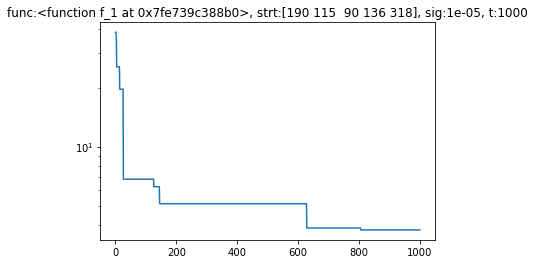

do_campaign 13 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_1 at 0x7fe739c388b0> , size: 5 , start: [190 115  90 136 318] , sig: 0.001 , t_max: 500


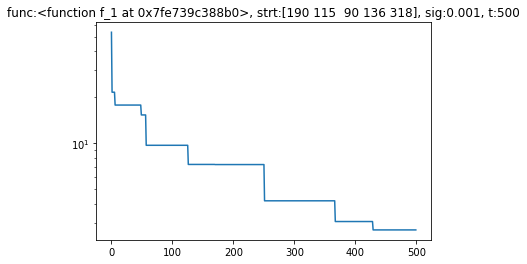

do_campaign 14 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_1 at 0x7fe739c388b0> , size: 5 , start: [190 115  90 136 318] , sig: 0.001 , t_max: 1000


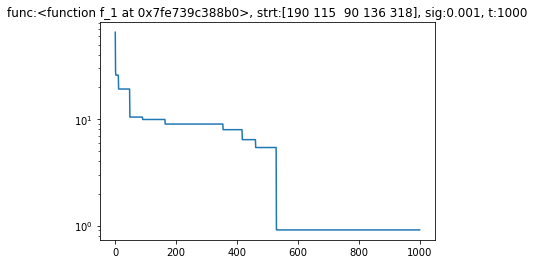

do_campaign 15 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_1 at 0x7fe739c388b0> , size: 5 , start: [190 115  90 136 318] , sig: 0.1 , t_max: 500


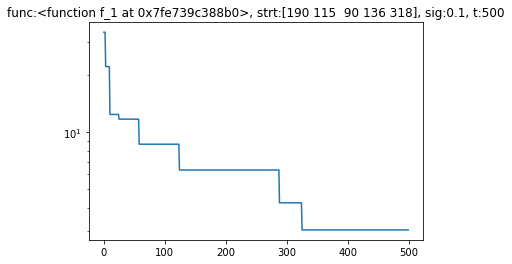

do_campaign 16 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_1 at 0x7fe739c388b0> , size: 5 , start: [190 115  90 136 318] , sig: 0.1 , t_max: 1000


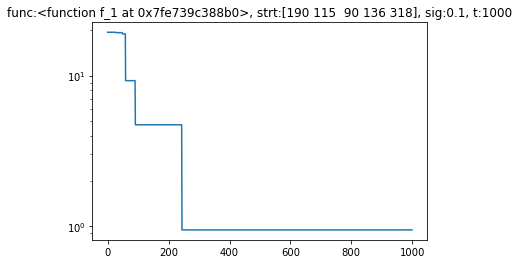

do_campaign 17 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_1 at 0x7fe739c388b0> , size: 5 , start: [190 115  90 136 318] , sig: 1 , t_max: 500


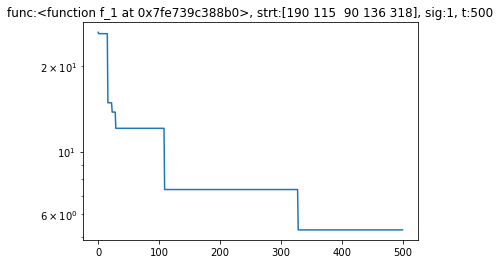

do_campaign 18 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_1 at 0x7fe739c388b0> , size: 5 , start: [190 115  90 136 318] , sig: 1 , t_max: 1000


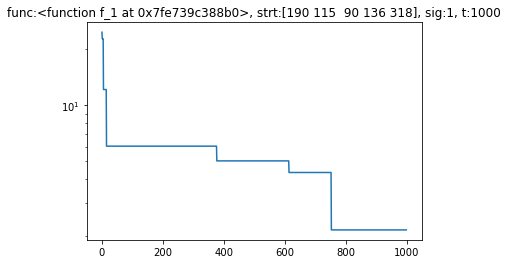

do_campaign 19 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_1 at 0x7fe739c388b0> , size: 5 , start: [190 115  90 136 318] , sig: 100 , t_max: 500


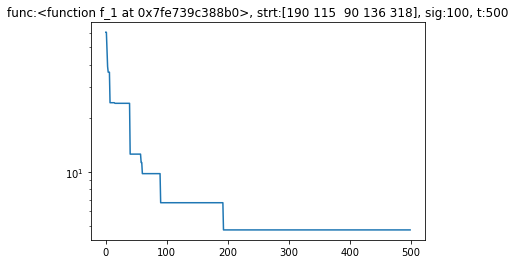

do_campaign 20 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_1 at 0x7fe739c388b0> , size: 5 , start: [190 115  90 136 318] , sig: 100 , t_max: 1000


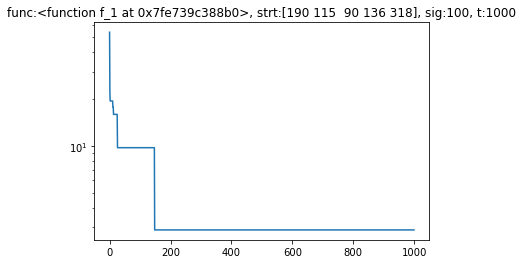

do_campaign 21 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_2 at 0x7fe739c38940> , size: 5 , start: [337 362 168 434 310] , sig: 1e-05 , t_max: 500


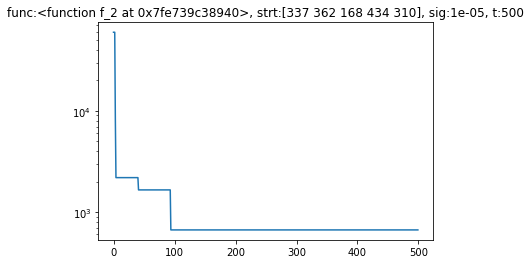

do_campaign 22 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_2 at 0x7fe739c38940> , size: 5 , start: [337 362 168 434 310] , sig: 1e-05 , t_max: 1000


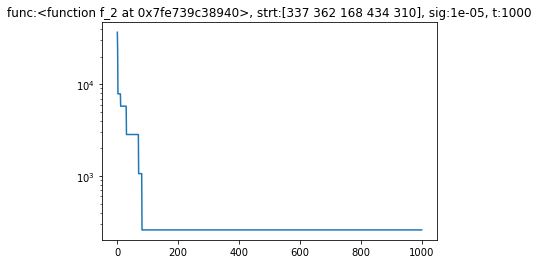

do_campaign 23 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_2 at 0x7fe739c38940> , size: 5 , start: [337 362 168 434 310] , sig: 0.001 , t_max: 500


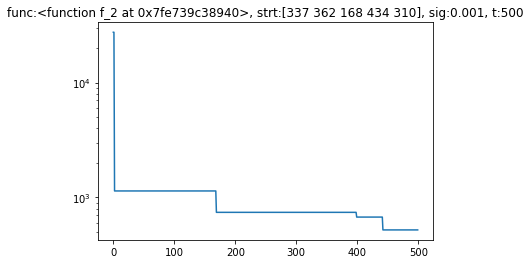

do_campaign 24 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_2 at 0x7fe739c38940> , size: 5 , start: [337 362 168 434 310] , sig: 0.001 , t_max: 1000


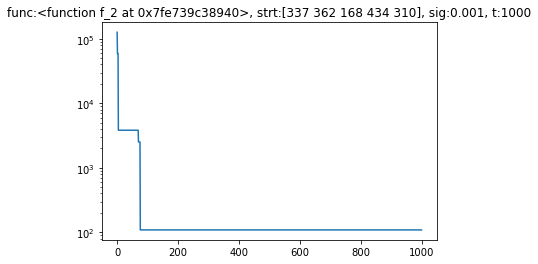

do_campaign 25 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_2 at 0x7fe739c38940> , size: 5 , start: [337 362 168 434 310] , sig: 0.1 , t_max: 500


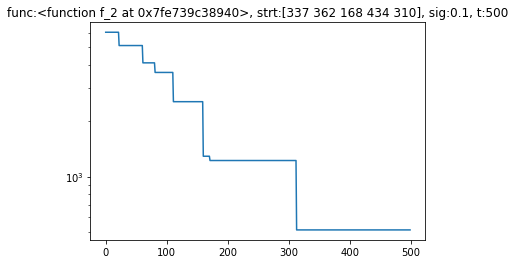

do_campaign 26 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_2 at 0x7fe739c38940> , size: 5 , start: [337 362 168 434 310] , sig: 0.1 , t_max: 1000


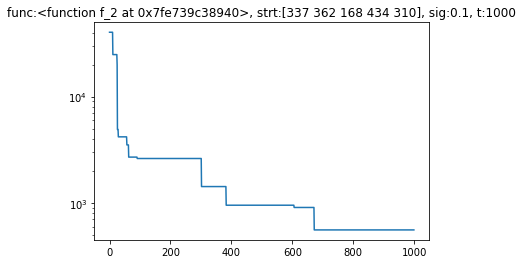

do_campaign 27 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_2 at 0x7fe739c38940> , size: 5 , start: [337 362 168 434 310] , sig: 1 , t_max: 500


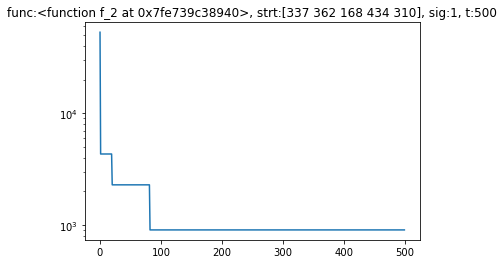

do_campaign 28 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_2 at 0x7fe739c38940> , size: 5 , start: [337 362 168 434 310] , sig: 1 , t_max: 1000


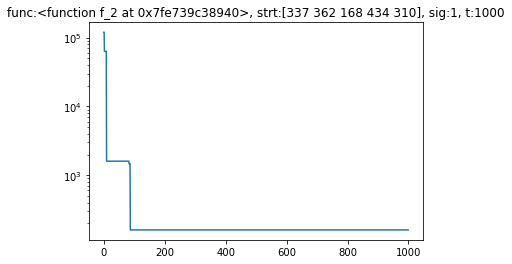

do_campaign 29 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_2 at 0x7fe739c38940> , size: 5 , start: [337 362 168 434 310] , sig: 100 , t_max: 500


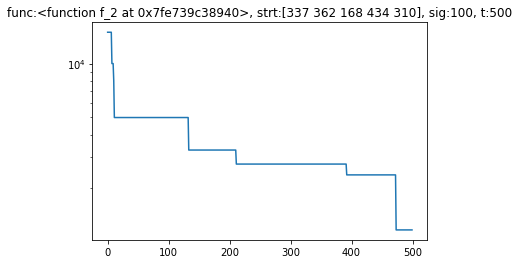

do_campaign 30 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_2 at 0x7fe739c38940> , size: 5 , start: [337 362 168 434 310] , sig: 100 , t_max: 1000


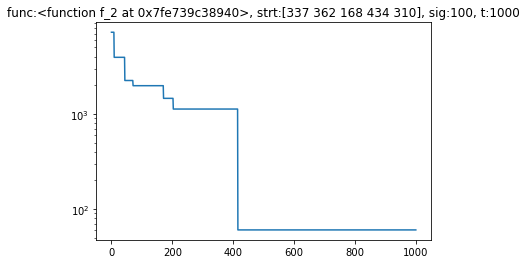

do_campaign 31 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_2 at 0x7fe739c38940> , size: 5 , start: [190 115  90 136 318] , sig: 1e-05 , t_max: 500


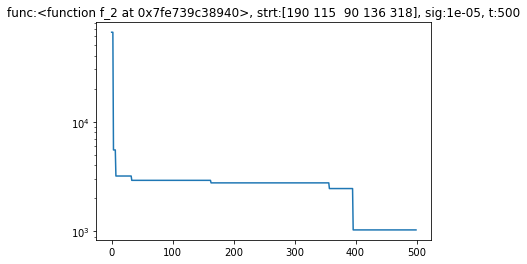

do_campaign 32 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_2 at 0x7fe739c38940> , size: 5 , start: [190 115  90 136 318] , sig: 1e-05 , t_max: 1000


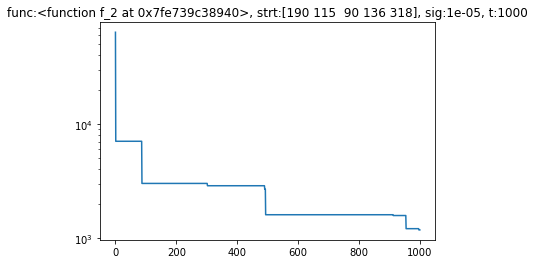

do_campaign 33 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_2 at 0x7fe739c38940> , size: 5 , start: [190 115  90 136 318] , sig: 0.001 , t_max: 500


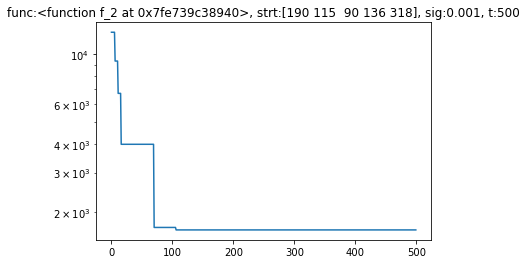

do_campaign 34 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_2 at 0x7fe739c38940> , size: 5 , start: [190 115  90 136 318] , sig: 0.001 , t_max: 1000


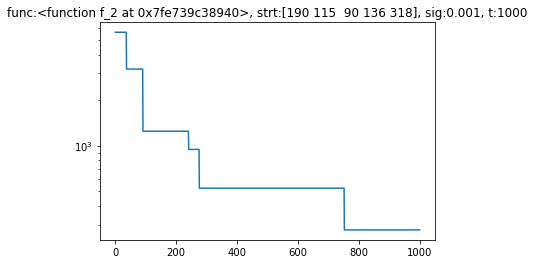

do_campaign 35 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_2 at 0x7fe739c38940> , size: 5 , start: [190 115  90 136 318] , sig: 0.1 , t_max: 500


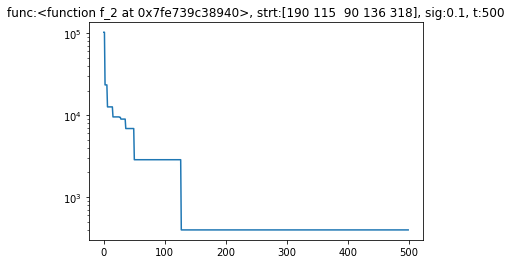

do_campaign 36 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_2 at 0x7fe739c38940> , size: 5 , start: [190 115  90 136 318] , sig: 0.1 , t_max: 1000


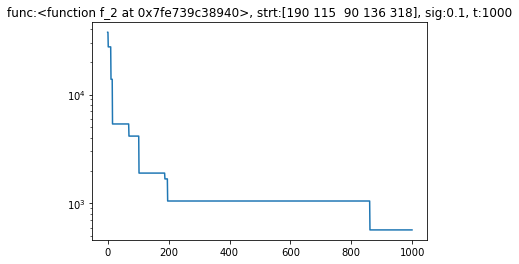

do_campaign 37 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_2 at 0x7fe739c38940> , size: 5 , start: [190 115  90 136 318] , sig: 1 , t_max: 500


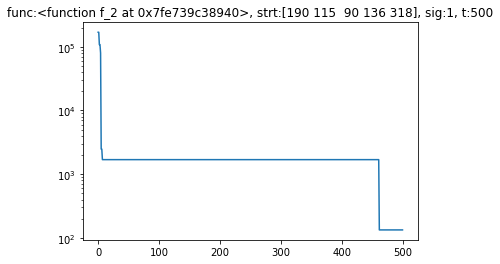

do_campaign 38 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_2 at 0x7fe739c38940> , size: 5 , start: [190 115  90 136 318] , sig: 1 , t_max: 1000


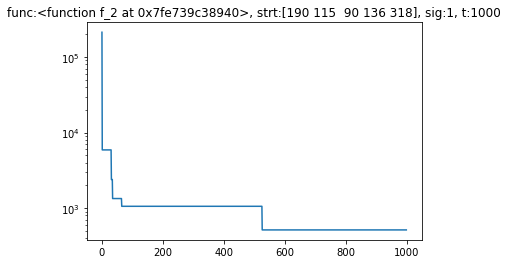

do_campaign 39 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_2 at 0x7fe739c38940> , size: 5 , start: [190 115  90 136 318] , sig: 100 , t_max: 500


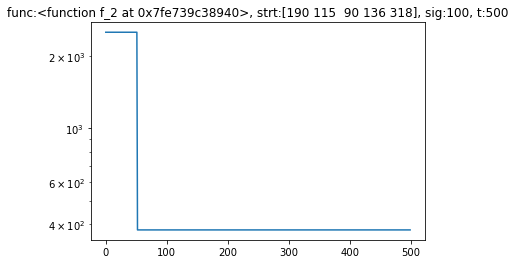

do_campaign 40 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_2 at 0x7fe739c38940> , size: 5 , start: [190 115  90 136 318] , sig: 100 , t_max: 1000


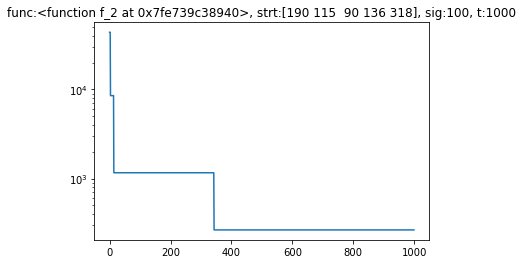

do_campaign 41 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_3 at 0x7fe739c389d0> , size: 5 , start: [337 362 168 434 310] , sig: 1e-05 , t_max: 500


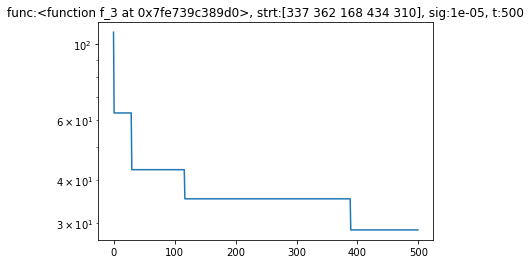

do_campaign 42 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_3 at 0x7fe739c389d0> , size: 5 , start: [337 362 168 434 310] , sig: 1e-05 , t_max: 1000


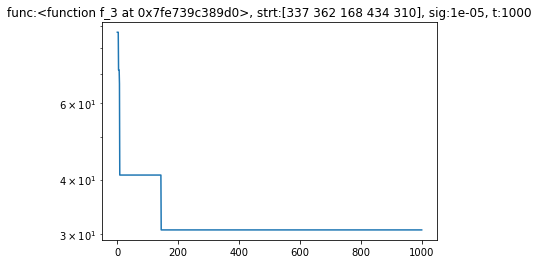

do_campaign 43 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_3 at 0x7fe739c389d0> , size: 5 , start: [337 362 168 434 310] , sig: 0.001 , t_max: 500


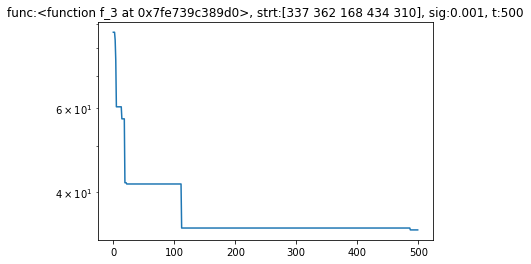

do_campaign 44 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_3 at 0x7fe739c389d0> , size: 5 , start: [337 362 168 434 310] , sig: 0.001 , t_max: 1000


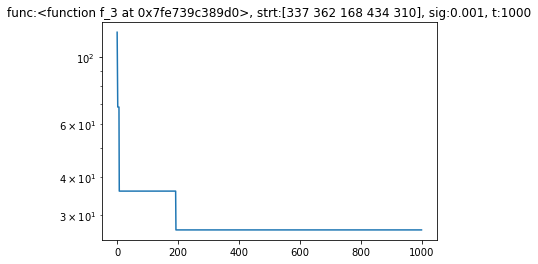

do_campaign 45 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_3 at 0x7fe739c389d0> , size: 5 , start: [337 362 168 434 310] , sig: 0.1 , t_max: 500


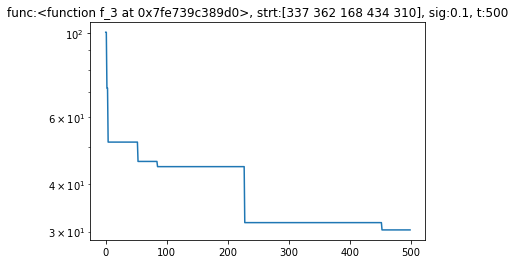

do_campaign 46 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_3 at 0x7fe739c389d0> , size: 5 , start: [337 362 168 434 310] , sig: 0.1 , t_max: 1000


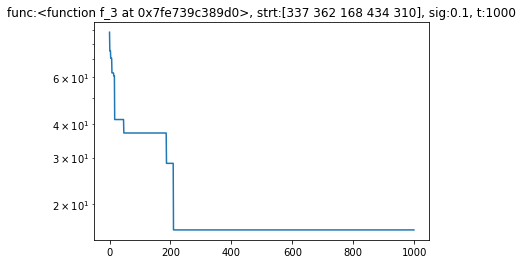

do_campaign 47 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_3 at 0x7fe739c389d0> , size: 5 , start: [337 362 168 434 310] , sig: 1 , t_max: 500


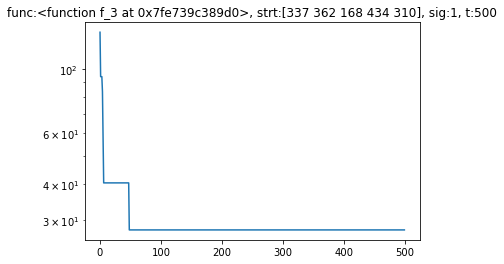

do_campaign 48 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_3 at 0x7fe739c389d0> , size: 5 , start: [337 362 168 434 310] , sig: 1 , t_max: 1000


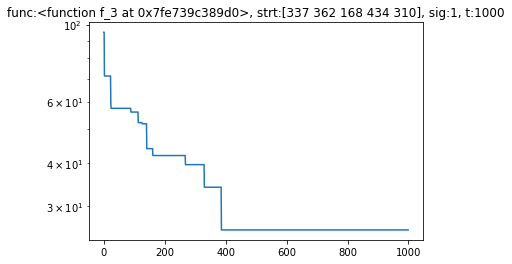

do_campaign 49 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_3 at 0x7fe739c389d0> , size: 5 , start: [337 362 168 434 310] , sig: 100 , t_max: 500


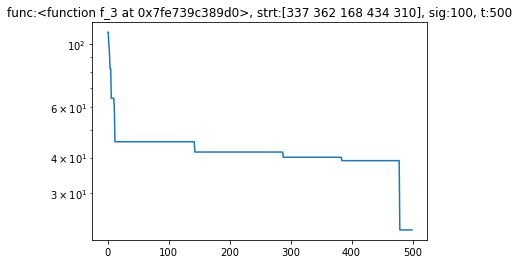

do_campaign 50 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_3 at 0x7fe739c389d0> , size: 5 , start: [337 362 168 434 310] , sig: 100 , t_max: 1000


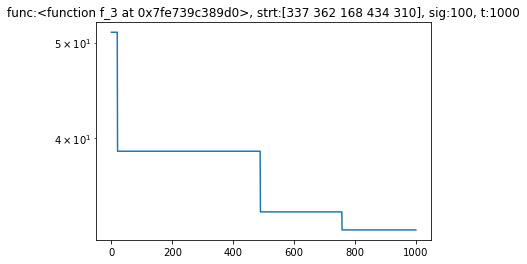

do_campaign 51 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_3 at 0x7fe739c389d0> , size: 5 , start: [190 115  90 136 318] , sig: 1e-05 , t_max: 500


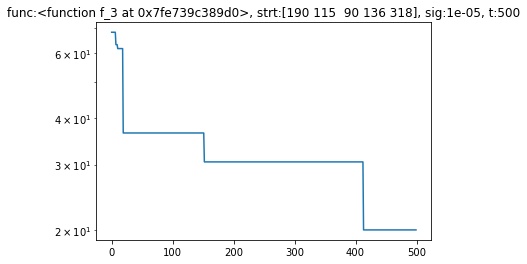

do_campaign 52 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_3 at 0x7fe739c389d0> , size: 5 , start: [190 115  90 136 318] , sig: 1e-05 , t_max: 1000


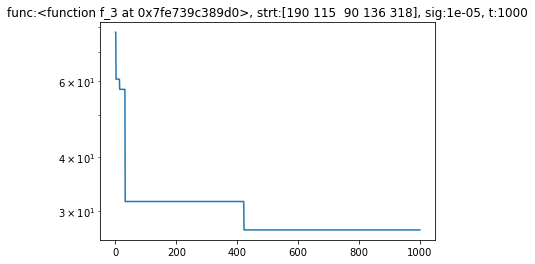

do_campaign 53 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_3 at 0x7fe739c389d0> , size: 5 , start: [190 115  90 136 318] , sig: 0.001 , t_max: 500


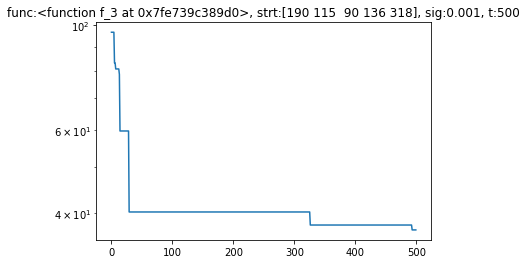

do_campaign 54 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_3 at 0x7fe739c389d0> , size: 5 , start: [190 115  90 136 318] , sig: 0.001 , t_max: 1000


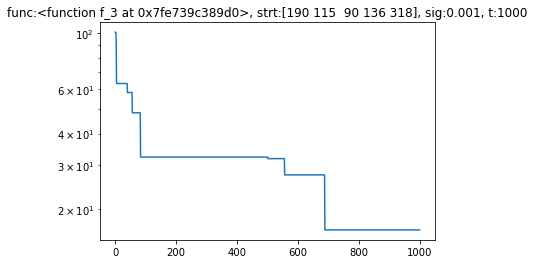

do_campaign 55 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_3 at 0x7fe739c389d0> , size: 5 , start: [190 115  90 136 318] , sig: 0.1 , t_max: 500


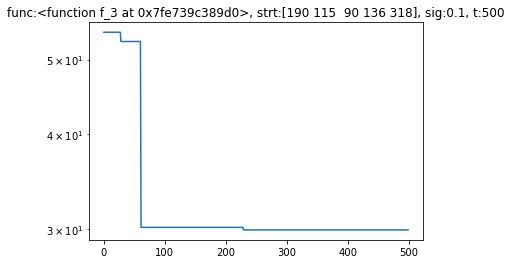

do_campaign 56 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_3 at 0x7fe739c389d0> , size: 5 , start: [190 115  90 136 318] , sig: 0.1 , t_max: 1000


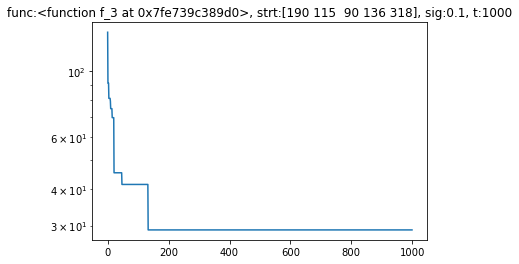

do_campaign 57 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_3 at 0x7fe739c389d0> , size: 5 , start: [190 115  90 136 318] , sig: 1 , t_max: 500


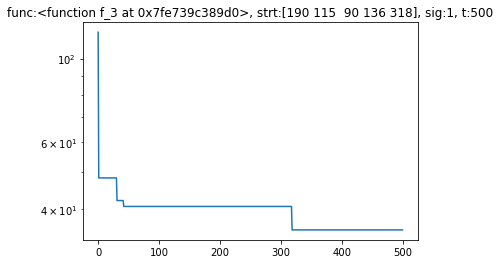

do_campaign 58 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_3 at 0x7fe739c389d0> , size: 5 , start: [190 115  90 136 318] , sig: 1 , t_max: 1000


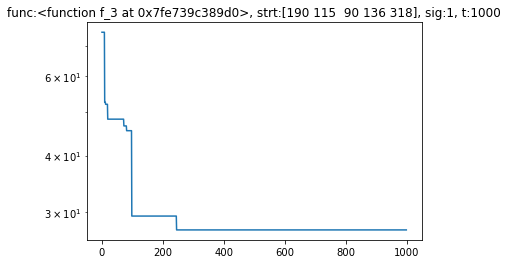

do_campaign 59 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_3 at 0x7fe739c389d0> , size: 5 , start: [190 115  90 136 318] , sig: 100 , t_max: 500


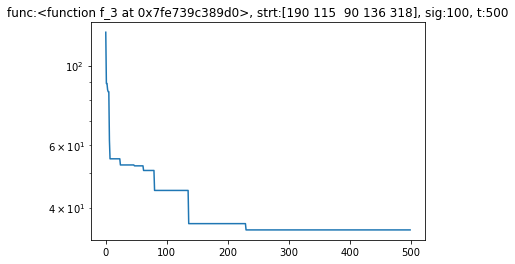

do_campaign 60 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_3 at 0x7fe739c389d0> , size: 5 , start: [190 115  90 136 318] , sig: 100 , t_max: 1000


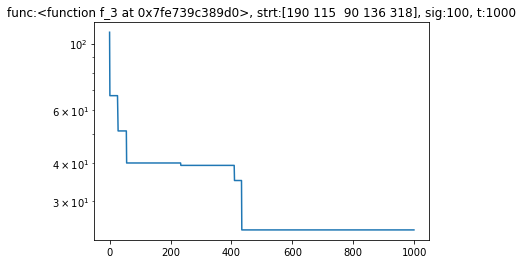

do_campaign 61 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_4 at 0x7fe739c38a60> , size: 5 , start: [337 362 168 434 310] , sig: 1e-05 , t_max: 500


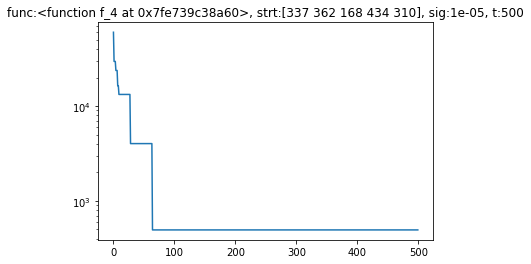

do_campaign 62 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_4 at 0x7fe739c38a60> , size: 5 , start: [337 362 168 434 310] , sig: 1e-05 , t_max: 1000


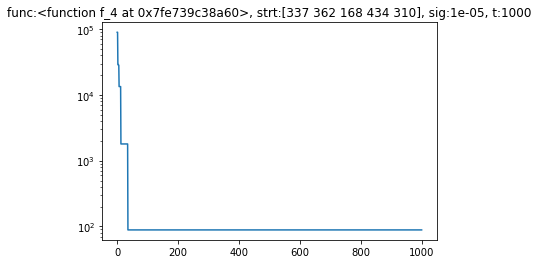

do_campaign 63 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_4 at 0x7fe739c38a60> , size: 5 , start: [337 362 168 434 310] , sig: 0.001 , t_max: 500


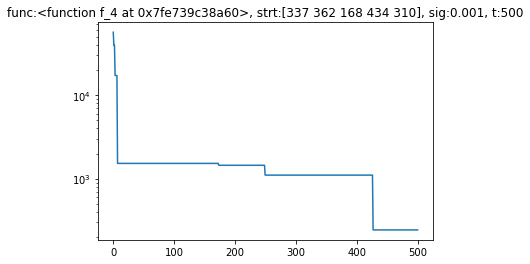

do_campaign 64 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_4 at 0x7fe739c38a60> , size: 5 , start: [337 362 168 434 310] , sig: 0.001 , t_max: 1000


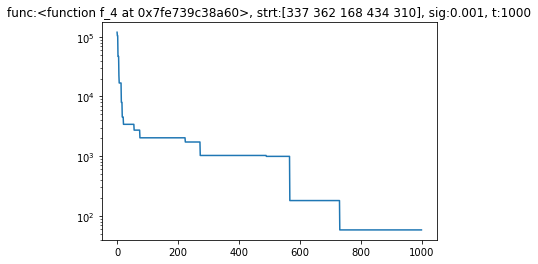

do_campaign 65 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_4 at 0x7fe739c38a60> , size: 5 , start: [337 362 168 434 310] , sig: 0.1 , t_max: 500


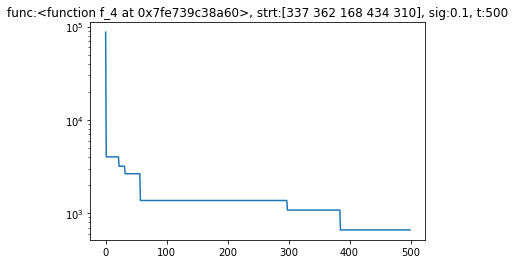

do_campaign 66 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_4 at 0x7fe739c38a60> , size: 5 , start: [337 362 168 434 310] , sig: 0.1 , t_max: 1000


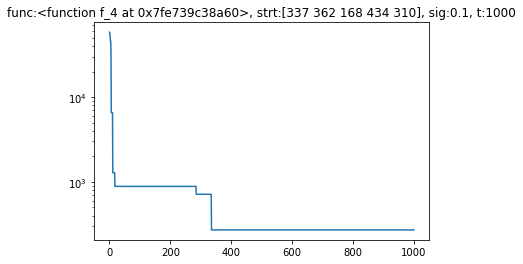

do_campaign 67 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_4 at 0x7fe739c38a60> , size: 5 , start: [337 362 168 434 310] , sig: 1 , t_max: 500


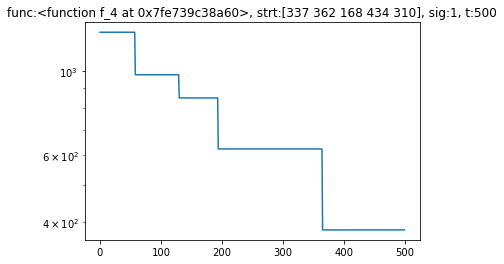

do_campaign 68 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_4 at 0x7fe739c38a60> , size: 5 , start: [337 362 168 434 310] , sig: 1 , t_max: 1000


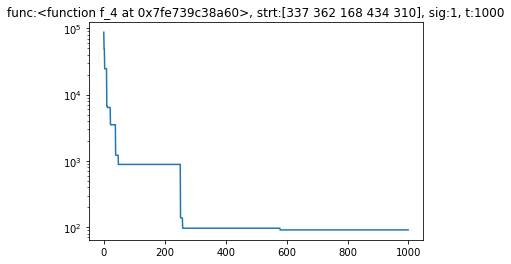

do_campaign 69 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_4 at 0x7fe739c38a60> , size: 5 , start: [337 362 168 434 310] , sig: 100 , t_max: 500


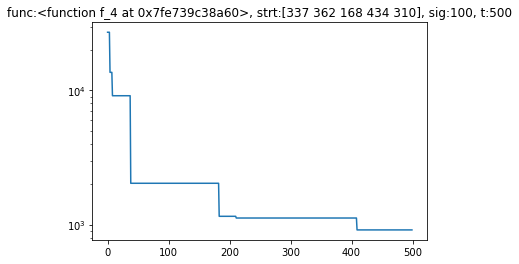

do_campaign 70 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_4 at 0x7fe739c38a60> , size: 5 , start: [337 362 168 434 310] , sig: 100 , t_max: 1000


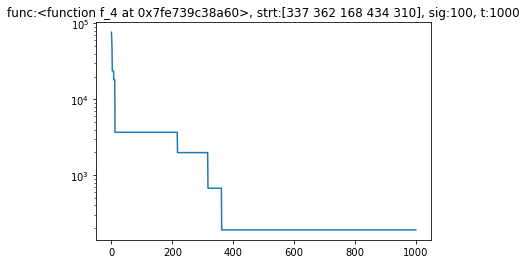

do_campaign 71 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_4 at 0x7fe739c38a60> , size: 5 , start: [190 115  90 136 318] , sig: 1e-05 , t_max: 500


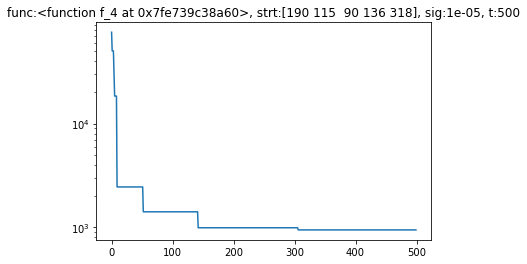

do_campaign 72 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_4 at 0x7fe739c38a60> , size: 5 , start: [190 115  90 136 318] , sig: 1e-05 , t_max: 1000


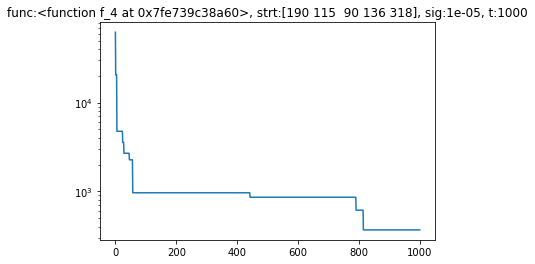

do_campaign 73 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_4 at 0x7fe739c38a60> , size: 5 , start: [190 115  90 136 318] , sig: 0.001 , t_max: 500


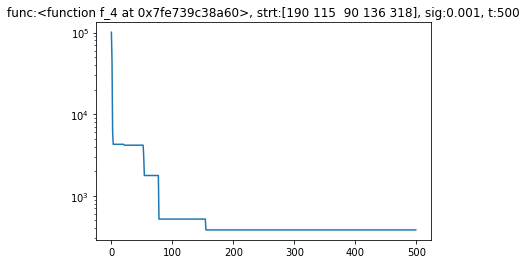

do_campaign 74 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_4 at 0x7fe739c38a60> , size: 5 , start: [190 115  90 136 318] , sig: 0.001 , t_max: 1000


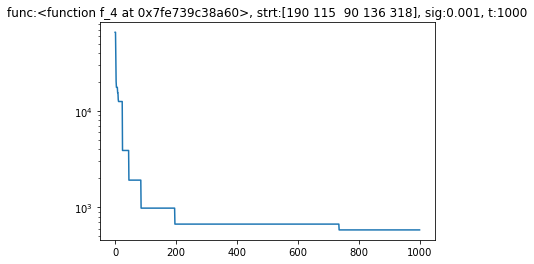

do_campaign 75 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_4 at 0x7fe739c38a60> , size: 5 , start: [190 115  90 136 318] , sig: 0.1 , t_max: 500


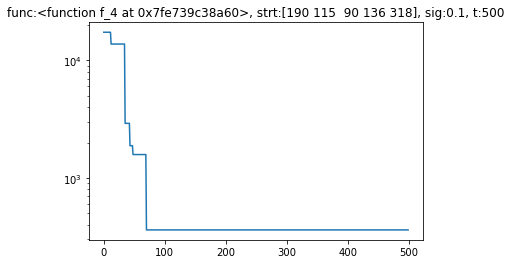

do_campaign 76 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_4 at 0x7fe739c38a60> , size: 5 , start: [190 115  90 136 318] , sig: 0.1 , t_max: 1000


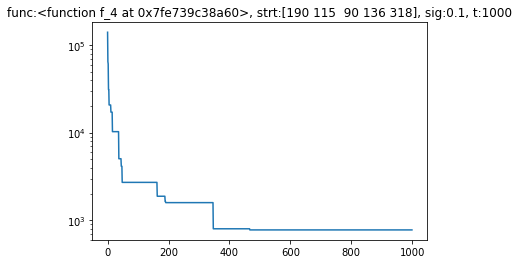

do_campaign 77 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_4 at 0x7fe739c38a60> , size: 5 , start: [190 115  90 136 318] , sig: 1 , t_max: 500


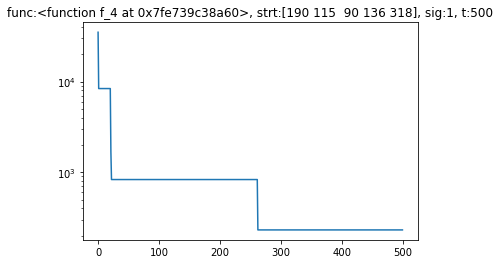

do_campaign 78 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_4 at 0x7fe739c38a60> , size: 5 , start: [190 115  90 136 318] , sig: 1 , t_max: 1000


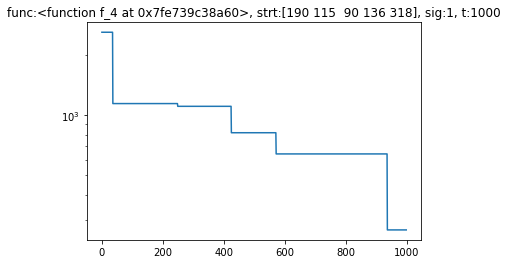

do_campaign 79 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_4 at 0x7fe739c38a60> , size: 5 , start: [190 115  90 136 318] , sig: 100 , t_max: 500


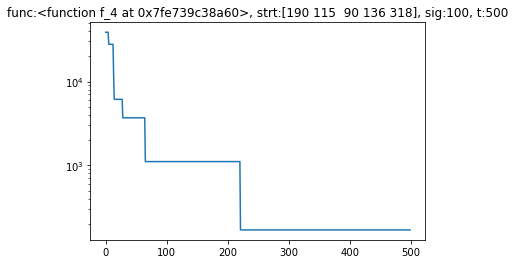

do_campaign 80 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_4 at 0x7fe739c38a60> , size: 5 , start: [190 115  90 136 318] , sig: 100 , t_max: 1000


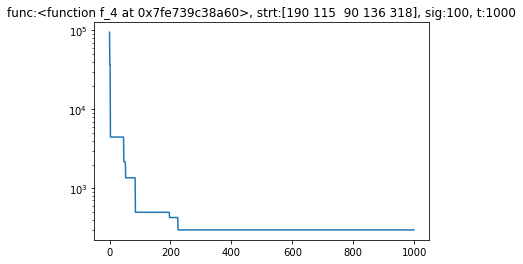

do_campaign 81 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_5 at 0x7fe739c38ee0> , size: 5 , start: [337 362 168 434 310] , sig: 1e-05 , t_max: 500


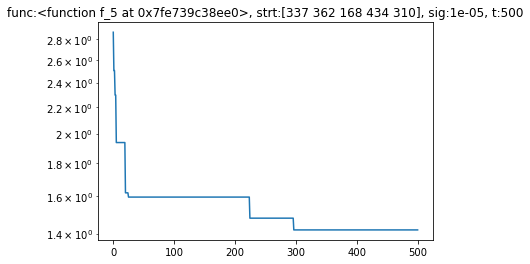

do_campaign 82 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_5 at 0x7fe739c38ee0> , size: 5 , start: [337 362 168 434 310] , sig: 1e-05 , t_max: 1000


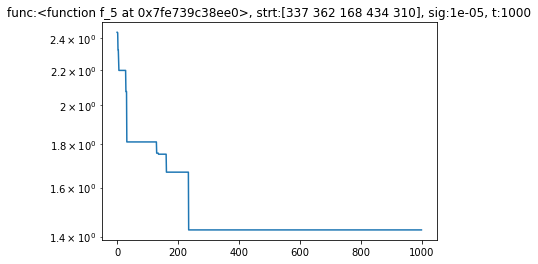

do_campaign 83 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_5 at 0x7fe739c38ee0> , size: 5 , start: [337 362 168 434 310] , sig: 0.001 , t_max: 500


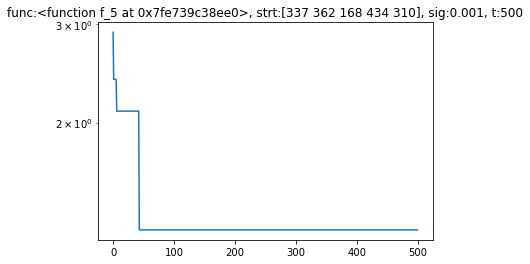

do_campaign 84 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_5 at 0x7fe739c38ee0> , size: 5 , start: [337 362 168 434 310] , sig: 0.001 , t_max: 1000


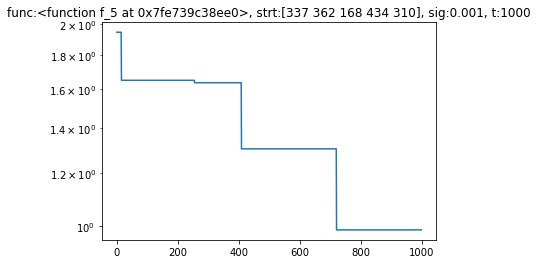

do_campaign 85 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_5 at 0x7fe739c38ee0> , size: 5 , start: [337 362 168 434 310] , sig: 0.1 , t_max: 500


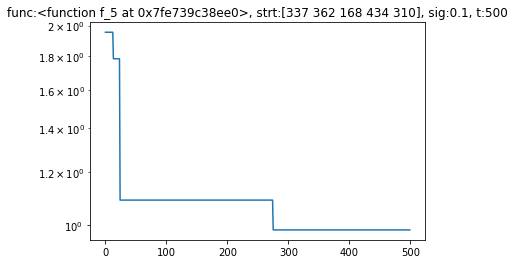

do_campaign 86 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_5 at 0x7fe739c38ee0> , size: 5 , start: [337 362 168 434 310] , sig: 0.1 , t_max: 1000


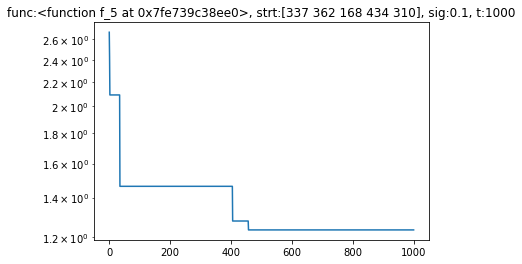

do_campaign 87 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_5 at 0x7fe739c38ee0> , size: 5 , start: [337 362 168 434 310] , sig: 1 , t_max: 500


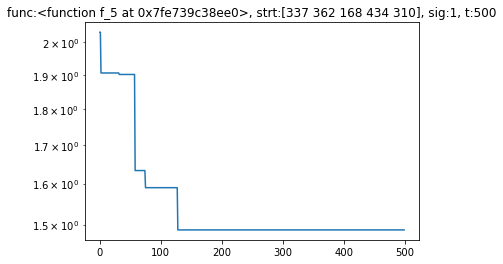

do_campaign 88 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_5 at 0x7fe739c38ee0> , size: 5 , start: [337 362 168 434 310] , sig: 1 , t_max: 1000


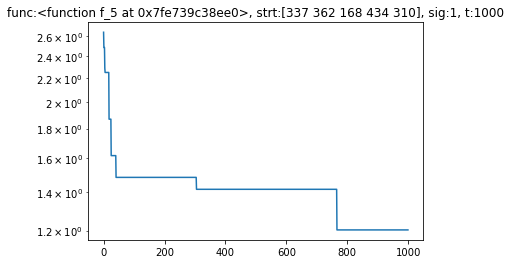

do_campaign 89 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_5 at 0x7fe739c38ee0> , size: 5 , start: [337 362 168 434 310] , sig: 100 , t_max: 500


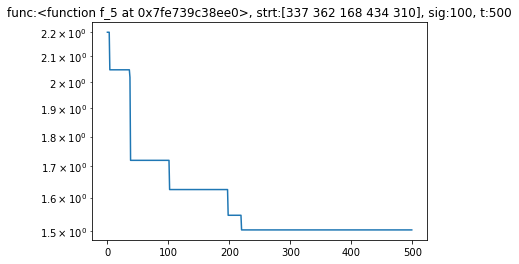

do_campaign 90 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_5 at 0x7fe739c38ee0> , size: 5 , start: [337 362 168 434 310] , sig: 100 , t_max: 1000


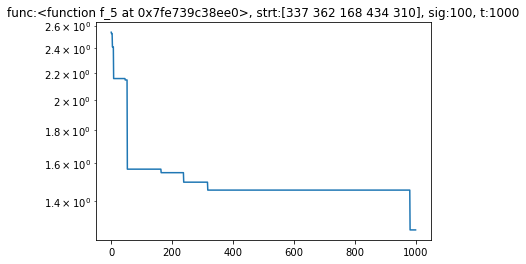

do_campaign 91 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_5 at 0x7fe739c38ee0> , size: 5 , start: [190 115  90 136 318] , sig: 1e-05 , t_max: 500


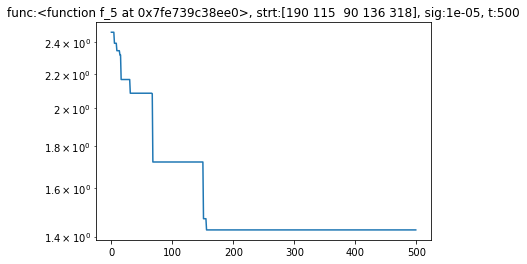

do_campaign 92 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_5 at 0x7fe739c38ee0> , size: 5 , start: [190 115  90 136 318] , sig: 1e-05 , t_max: 1000


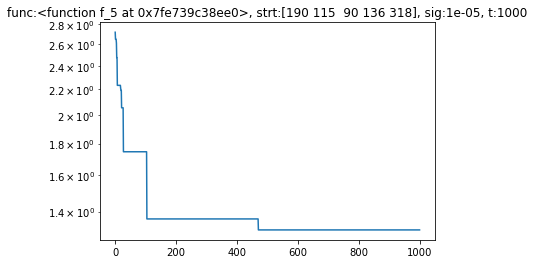

do_campaign 93 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_5 at 0x7fe739c38ee0> , size: 5 , start: [190 115  90 136 318] , sig: 0.001 , t_max: 500


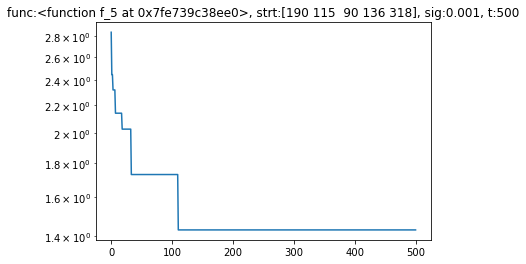

do_campaign 94 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_5 at 0x7fe739c38ee0> , size: 5 , start: [190 115  90 136 318] , sig: 0.001 , t_max: 1000


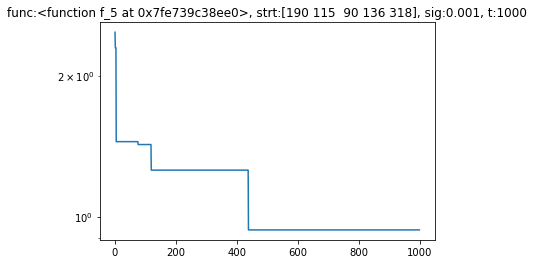

do_campaign 95 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_5 at 0x7fe739c38ee0> , size: 5 , start: [190 115  90 136 318] , sig: 0.1 , t_max: 500


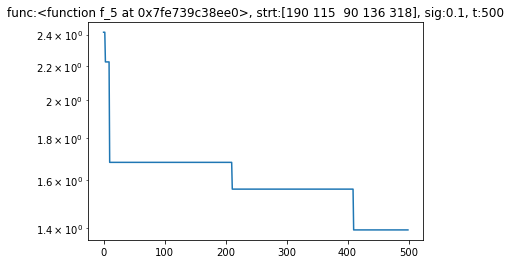

do_campaign 96 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_5 at 0x7fe739c38ee0> , size: 5 , start: [190 115  90 136 318] , sig: 0.1 , t_max: 1000


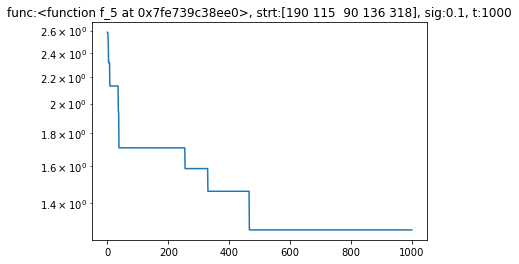

do_campaign 97 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_5 at 0x7fe739c38ee0> , size: 5 , start: [190 115  90 136 318] , sig: 1 , t_max: 500


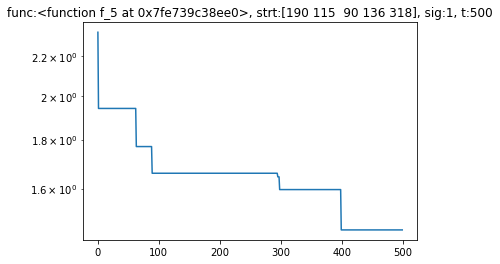

do_campaign 98 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_5 at 0x7fe739c38ee0> , size: 5 , start: [190 115  90 136 318] , sig: 1 , t_max: 1000


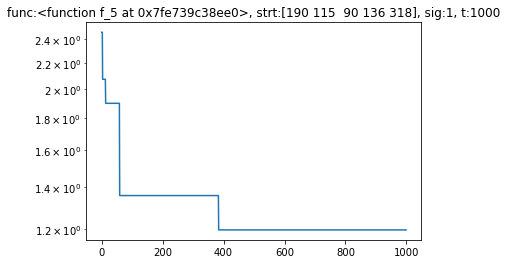

do_campaign 99 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_5 at 0x7fe739c38ee0> , size: 5 , start: [190 115  90 136 318] , sig: 100 , t_max: 500


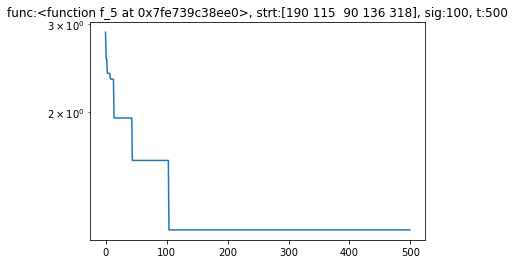

do_campaign 100 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_5 at 0x7fe739c38ee0> , size: 5 , start: [190 115  90 136 318] , sig: 100 , t_max: 1000


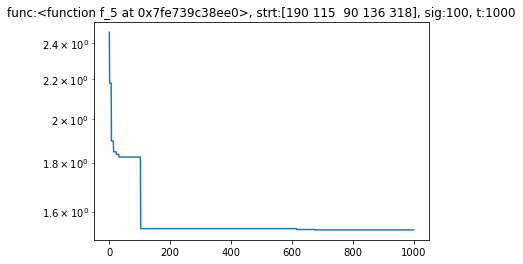

do_campaign 101 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_6 at 0x7fe739c38f70> , size: 5 , start: [337 362 168 434 310] , sig: 1e-05 , t_max: 500


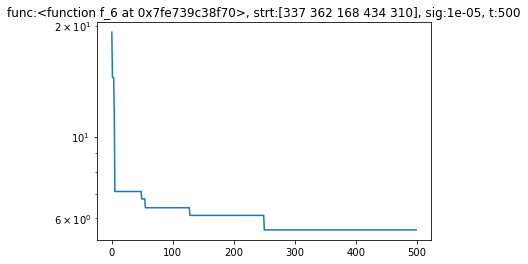

do_campaign 102 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_6 at 0x7fe739c38f70> , size: 5 , start: [337 362 168 434 310] , sig: 1e-05 , t_max: 1000


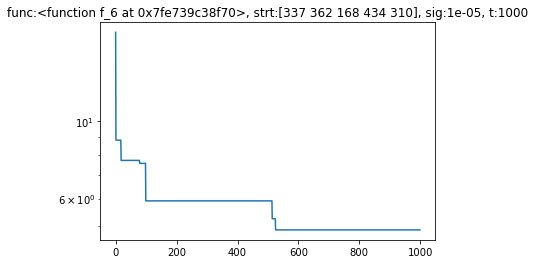

do_campaign 103 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_6 at 0x7fe739c38f70> , size: 5 , start: [337 362 168 434 310] , sig: 0.001 , t_max: 500


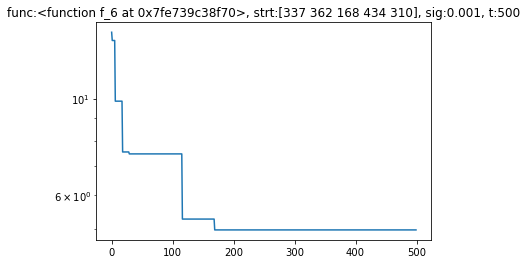

do_campaign 104 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_6 at 0x7fe739c38f70> , size: 5 , start: [337 362 168 434 310] , sig: 0.001 , t_max: 1000


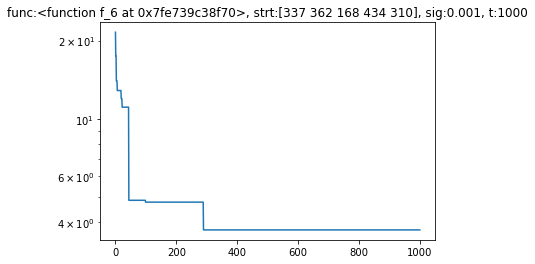

do_campaign 105 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_6 at 0x7fe739c38f70> , size: 5 , start: [337 362 168 434 310] , sig: 0.1 , t_max: 500


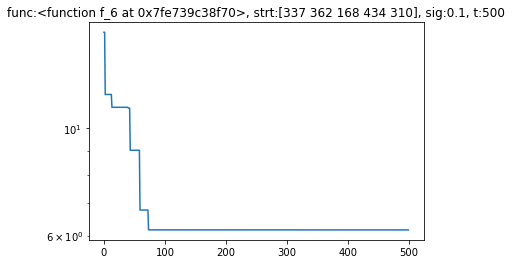

do_campaign 106 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_6 at 0x7fe739c38f70> , size: 5 , start: [337 362 168 434 310] , sig: 0.1 , t_max: 1000


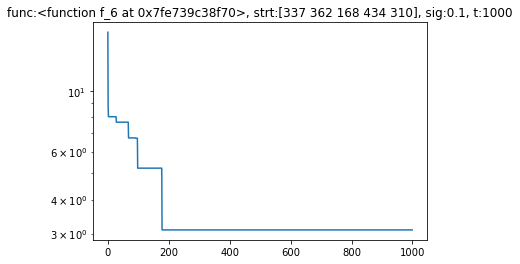

do_campaign 107 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_6 at 0x7fe739c38f70> , size: 5 , start: [337 362 168 434 310] , sig: 1 , t_max: 500


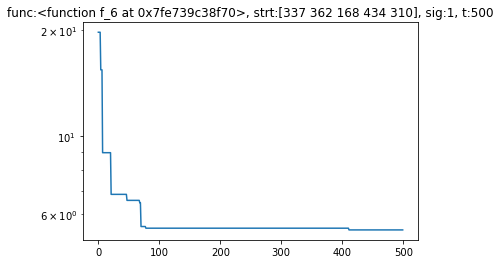

do_campaign 108 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_6 at 0x7fe739c38f70> , size: 5 , start: [337 362 168 434 310] , sig: 1 , t_max: 1000


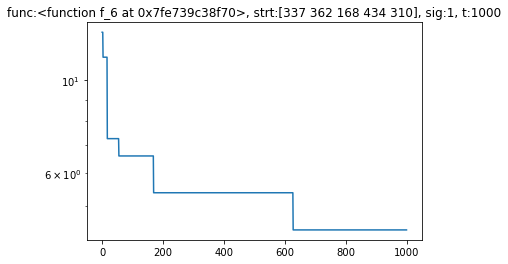

do_campaign 109 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_6 at 0x7fe739c38f70> , size: 5 , start: [337 362 168 434 310] , sig: 100 , t_max: 500


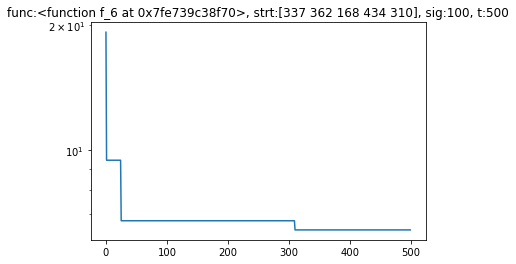

do_campaign 110 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_6 at 0x7fe739c38f70> , size: 5 , start: [337 362 168 434 310] , sig: 100 , t_max: 1000


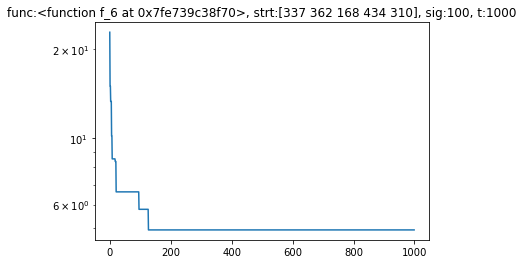

do_campaign 111 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_6 at 0x7fe739c38f70> , size: 5 , start: [190 115  90 136 318] , sig: 1e-05 , t_max: 500


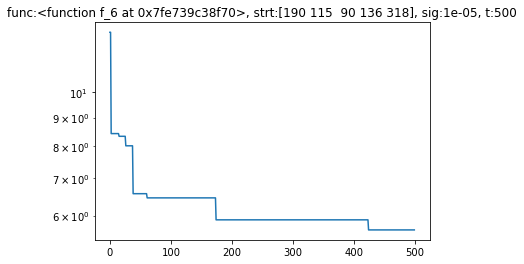

do_campaign 112 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_6 at 0x7fe739c38f70> , size: 5 , start: [190 115  90 136 318] , sig: 1e-05 , t_max: 1000


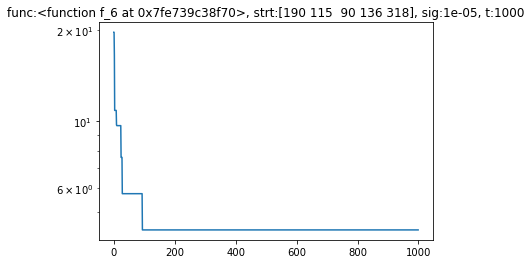

do_campaign 113 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_6 at 0x7fe739c38f70> , size: 5 , start: [190 115  90 136 318] , sig: 0.001 , t_max: 500


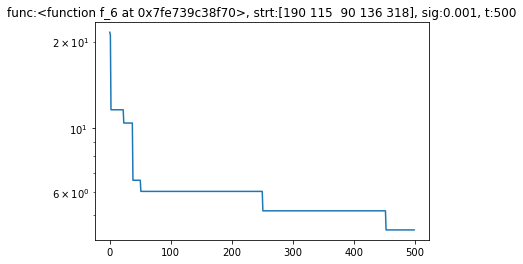

do_campaign 114 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_6 at 0x7fe739c38f70> , size: 5 , start: [190 115  90 136 318] , sig: 0.001 , t_max: 1000


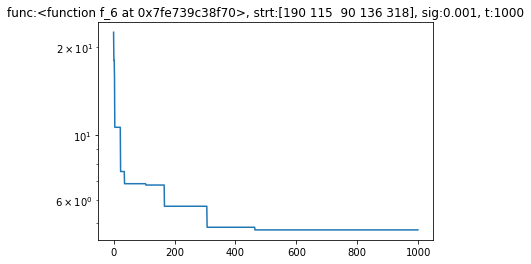

do_campaign 115 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_6 at 0x7fe739c38f70> , size: 5 , start: [190 115  90 136 318] , sig: 0.1 , t_max: 500


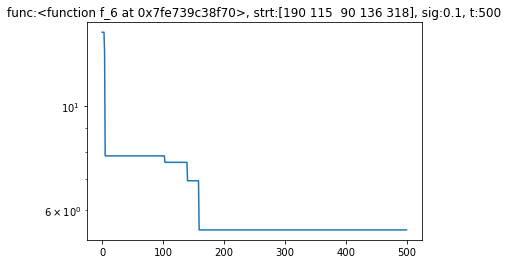

do_campaign 116 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_6 at 0x7fe739c38f70> , size: 5 , start: [190 115  90 136 318] , sig: 0.1 , t_max: 1000


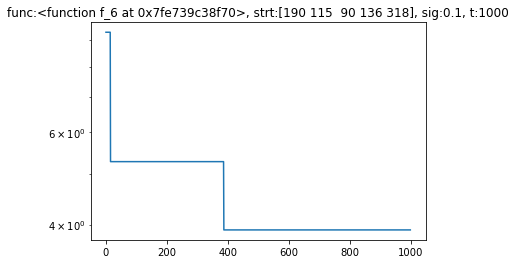

do_campaign 117 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_6 at 0x7fe739c38f70> , size: 5 , start: [190 115  90 136 318] , sig: 1 , t_max: 500


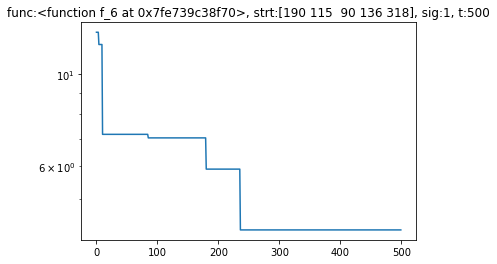

do_campaign 118 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_6 at 0x7fe739c38f70> , size: 5 , start: [190 115  90 136 318] , sig: 1 , t_max: 1000


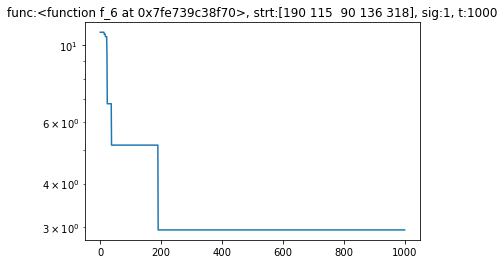

do_campaign 119 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_6 at 0x7fe739c38f70> , size: 5 , start: [190 115  90 136 318] , sig: 100 , t_max: 500


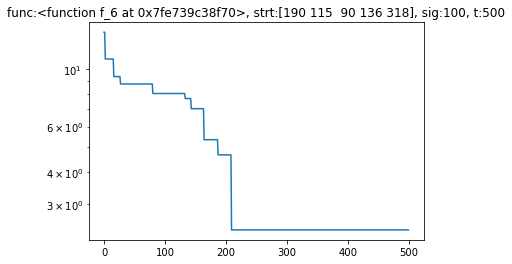

do_campaign 120 : strat: <function random_search at 0x7fe739c38af0> , func:  <function f_6 at 0x7fe739c38f70> , size: 5 , start: [190 115  90 136 318] , sig: 100 , t_max: 1000


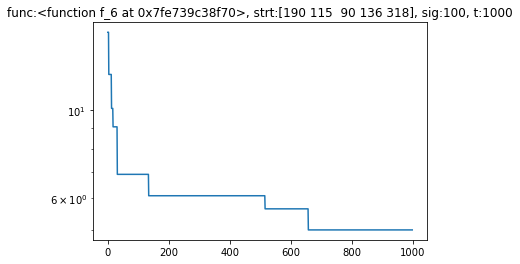

do_campaign 121 : strat: <function ES_adaptatif_step_size at 0x7fe739c38dc0> , func:  <function f_1 at 0x7fe739c388b0> , size: 5 , start: [337 362 168 434 310] , sig: 1e-05 , t_max: 500


ValueError: too many values to unpack (expected 2)

In [10]:
strats = [random_search, ES_adaptatif_step_size]
fs = [f_1, f_2, f_3, f_4, f_5, f_6]
size = 5
starts = np.random.randint(1,500,(2,size))
sigs = [1e-5, 1e-3, 1e-1, 1, 100]
t_maxs = [500, 1000]
do_campaign(strats, fs, size, starts, sigs, t_maxs, verbose=True)